# Открытие общепита в Москве

## Описание проекта

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Для начала я подготовлю исследование рынка Москвы, найду интересные особенности и презентую полученные результаты, которые в будущем помогут выбрать подходящее место для инвесторов.

## Описание данных

Мне доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

`moscow_places.csv`:
- `name` — название заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
<br>и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»: 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»: 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- `chain` — число, выраженное `0` или `1`, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым
- `seats` — количество посадочных мест.

## План исследования

**1. Загрузка данных, изучение общей информации и предобработка данных**

Изучу общую информацию о датасете: сколько заведений представлено, что можно сказать о каждом столбце, какие типы данных хранятся.

Проверю наличие дубликатов и пропусков: встречаются ли они, в каких столбцах, можно ли их обработать или оставить как есть.

Выполню предобработку данных:
	•	Создам столбец `street` с названиями улиц из столбца с адресом.
	•	Создам столбец `is_24/7`, чтобы определить, работает ли заведение круглосуточно и ежедневно (`True` — работает, `False` — не работает).

**2. Анализ данных**

- Определю категории заведений и исследую количество объектов общественного питания по категориям (рестораны, кофейни, пиццерии, бары и т.д.), визуализирую распределение.
- Проанализирую количество посадочных мест в заведениях по категориям и визуализирую результаты.
- Рассмотрю соотношение сетевых и несетевых заведений, исследую, какие категории чаще являются сетевыми.
- Найду топ-15 популярных сетей по количеству заведений, визуализирую результаты, анализирую категории и общие признаки сетей.
- Определю административные районы Москвы в датасете, проанализирую распределение заведений по районам, визуализирую.
- Визуализирую распределение средних рейтингов по категориям и сравню их.
- Построю фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.
- Отображу все заведения на карте с помощью кластеров (библиотека folium).
- Найду улицы с одним объектом общепита, проанализирую их особенности.
- Рассчитаю медиану столбца middle_avg_bill для каждого района и построю фоновую картограмму с ценовыми индикаторами. Проанализирую связь цен с удалённостью от центра.

(Возможно, дополню исследование другими взаимосвязями, например, изучу часы работы заведений, особенности заведений с низкими рейтингами или распределение категорий заведений с плохими отзывами.)

Соберу наблюдения в общий вывод.

**3. Детализация исследования: открытие кофейни**

Проанализирую возможность открытия кофейни наподобие «Central Perk» в Москве:
- Определю общее количество кофеен, их распределение по районам и особенности расположения.
- Исследую, есть ли круглосуточные кофейни.
- Проанализирую рейтинги кофеен и их распределение по районам.
- Оценю, на какую стоимость чашки капучино стоит ориентироваться, и объясню выбор.

Добавлю, при необходимости, собственные вопросы для исследования. Построю визуализации и дам рекомендации для открытия кофейни, подкреплю их текстовыми пояснениями или отметками на карте.

**4. Подготовка презентации**

На основе проведённого анализа подготовлю информативную и лаконичную презентацию с выводами и рекомендациями.

## 1. Загрузка данных, изучение общей информации и предобработка данных

In [1]:
# !pip install python-Levenshtein
# !pip install fuzzywuzzy

# !pip install missingno

# !pip install folium

# !pip install wordcloud

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import process

import missingno as msno

import json
from folium import (Map,
                    Choropleth,
                    Marker)
from folium.plugins import MarkerCluster

from wordcloud import WordCloud

In [3]:
# Импортируем данные для анализа
df = pd.read_csv('moscow_places.csv')

# Импортируем GeoJSON-файл
with open('admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

### Изучение общей информации

In [4]:
# Выведем датафрейм
df.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

---

Данные соответствуют описанию. Обнаружены пропуски в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`, `seats`.

---

In [5]:
# Выведем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


---

В следующих столбцах обнаружены пропуски: `hours`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`, `seats`.

Столбцы, типы данных которых требуют уточнения: `middle_avg_bill`, `middle_coffee_cup`, `chain`, `seats`.

---

In [6]:
# Посчитаем количество уникальных значений и пропусков по столбцам, чтобы лучше понять структуру данных
pd.DataFrame({'unique_values': df.nunique(),
              'missing_values': df.isna().sum(),
             'missing_values_%': (df.isna().sum() / len(df) * 100).round().astype(int)})

unique_values  missing_values  missing_values_%
name                        5614               0                 0
category                       8               0                 0
address                     5753               0                 0
district                       9               0                 0
hours                       1307             536                 6
lat                         8209               0                 0
lng                         8258               0                 0
rating                        41               0                 0
price                          4            5091                61
avg_bill                     897            4590                55
middle_avg_bill              230            5257                63
middle_coffee_cup             96            7871                94
chain                          2               0                 0
seats                        229            3611                43

--- 

- В столбце `name` есть дубликаты, которые, гипотетически, связаны с наличием сетевых заведений с одинаковым названием. Однако нельзя исключать возможность встретить одно и то же название для разных заведений, поскольку нет указания на то, что данные беруется из ЕГРЮЛ с юридической точностью. **Тем не менее, на данный момент мы имеем дело с более чем 5600 заведениями.**
- В столбце `category` есть 8 категорий, которые мы выведем далее.
- В столбце `address` есть дубликаты, которые объясняются тем, что в одном здании может быть несколько несвязанных друг с другом заведений.
- В столбце `district` представлены 9 административных округов Москвы, которые мы выведем далее.
- В столбце `hours` есть 1307 уникальных значений, что кажется неверным, ведь разнообразие графика работы заведений не может быть таким большим. Пропуски составляют 6% данных столбца.
- В столбцах `lat`, `lng` есть дубликаты, которые объясняются тем, что на одной долготе или широте может находится несколько не связанных друг с другом заведений.
- В столбце `rating` 41 уникальная оценка, и в этом нет ничего необычного.
- В столбце `price` 4 категории в соответствии с описанием. Пропуски составляют 61% значений.
- В столбцах `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` мало уникальных значений и 55, 63 и 94% пропусков соответственно.
- В столбце `chain` задана булева переменная в соответствии с описанием.
- В столбце `seats` 229 уникальных значений и 43% пропусков.

---

In [7]:
# Выведем на экран переменные с небольшим количеством уникальных значений — категориальные переменные
display(df['category'].unique())
display(df['district'].unique())
display(df['price'].unique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

---

- В столбце `category` есть категории со схожими функциями: булочная, кафе, кофейня. Вряд ли это помешает анализу, но это необходимо отметить.
- В столбце `disctrict` представлены 9 административных округов Москвы. С 2012 год их 12; не хватает Зеленоградского, Новомосковского и Троицкого округов. Взяты только те округа, которые концентрируются радиально вокруг центра города.
- В столбце `price` представлены 4 категории цен. Присутствуют пропуски в данных.

---

In [8]:
# Исключение сетевых заведений из поиска явных дубликатов
non_chain_df = df[df['chain'] == False]

# Проверка на дубликаты в столбце 'name' среди несетевых заведений
# non_chain_df[non_chain_df.duplicated('name', keep=False)]
non_chain_df['name'][non_chain_df['name'].duplicated()].unique()

array(['Кафе', 'Шаурма', 'Ресторан', 'Столовая', 'Кафе-столовая', 'Буфет',
       'Кофейня', 'Бистро', 'Шашлычная', 'Пиццерия', 'Блины', 'Трапезная',
       'Поминальные обеды', 'Кафе для поминок', 'Чебуречная',
       'Кафе-кулинария'], dtype=object)

---

Явные дубликаты обусловлены низким качеством данных в целом. Ничего сделать с этим мы не можем.

---

In [9]:
# # Получение списка уникальных названий
# names = df['name'].unique()

# # Поиск неявных дубликатов
# threshold = 90  # Установите пороговое значение сходства
# potential_duplicates = []

# for name in names:
#     matches = process.extract(name, names, limit=2)  # Найти наиболее похожие названия
#     for match in matches:
#         if match[1] >= threshold and match[0] != name:
#             potential_duplicates.append((name, match[0]))

# # Вывод потенциальных дубликатов
# potential_duplicates = list(set(potential_duplicates))
# for dup in potential_duplicates:
#     print(dup)

---

Поиск неявных дубликатов может помочь выявить дубликаты, но это очень трудоёмко, и вряд ли подразумевается в этом проекте, учитывая синтетических характер данных. Обработаем некоторые из них.

---

In [10]:
# Словарь для сопоставления старых и новых названий
rename_dict = {
    'Wild Bean Cafe': 'Wild Bean',
    'The wild bean cafe': 'Wild Bean',
    'Кофейня One&Double': 'One&Double',
    'One And Double': 'One&Double'
    # Добавьте здесь другие пары старых и новых названий
}

# Производим переименование
df['name'] = df['name'].replace(rename_dict)

In [11]:
# Приведём к нижнему регистру
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

# Найдём дубликаты
duplicates = df.duplicated(subset=['name', 'address'], keep=False)
duplicate_data = df[duplicates]

# Выведем результаты
duplicate_data.sort_values(by=['name', 'address'])

name  category  \
1430                  more poke  ресторан   
1511                  more poke  ресторан   
189                        кафе      кафе   
215                        кафе      кафе   
2211  раковарня клешни и хвосты  ресторан   
2420  раковарня клешни и хвосты   бар,паб   
3091            хлеб да выпечка  булочная   
3109            хлеб да выпечка      кафе   

                                      address  \
1430  москва, волоколамское шоссе, 11, стр. 2   
1511  москва, волоколамское шоссе, 11, стр. 2   
189              москва, парк ангарские пруды   
215              москва, парк ангарские пруды   
2211               москва, проспект мира, 118   
2420               москва, проспект мира, 118   
3091              москва, ярцевская улица, 19   
3109              москва, ярцевская улица, 19   

                                     district  \
1430          Северный административный округ   
1511          Северный административный округ   
189           Северный административный округ   
215           Северный административный округ   
2211  Северо-Восточный административный округ   
2420  Северо-Восточный административный округ   
3091          Западный административный округ   
3109          Западный административный округ   

                                                  hours        lat        lng  \
1430                             ежедневно, 09:00–21:00  55.806307  37.497566   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
189                              ежедневно, 09:00–23:00  55.880327  37.530786   
215                              ежедневно, 10:00–22:00  55.881438  37.531848   
2211                             ежедневно, 12:00–00:00  55.810553  37.638161   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.810677  37.638379   
3091                             ежедневно, 09:00–22:00  55.738886  37.411648   
3109                                                NaN  55.738449  37.410937   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
1430     4.2   NaN      NaN              NaN                NaN      0  188.0  
1511     4.2   NaN      NaN              NaN                NaN      1  188.0  
189      3.2   NaN      NaN              NaN                NaN      0    NaN  
215      3.2   NaN      NaN              NaN                NaN      0    NaN  
2211     4.4   NaN      NaN              NaN                NaN      0  150.0  
2420     4.4   NaN      NaN              NaN                NaN      1  150.0  
3091     4.1   NaN      NaN              NaN                NaN      1  276.0  
3109     4.1   NaN      NaN              NaN                NaN      0  276.0

In [12]:
# Удалим дубликаты, оставляя первое уникальное вхождение
df = df.drop_duplicates(subset=['name', 'address'], keep='first')

### Работа с пропусками

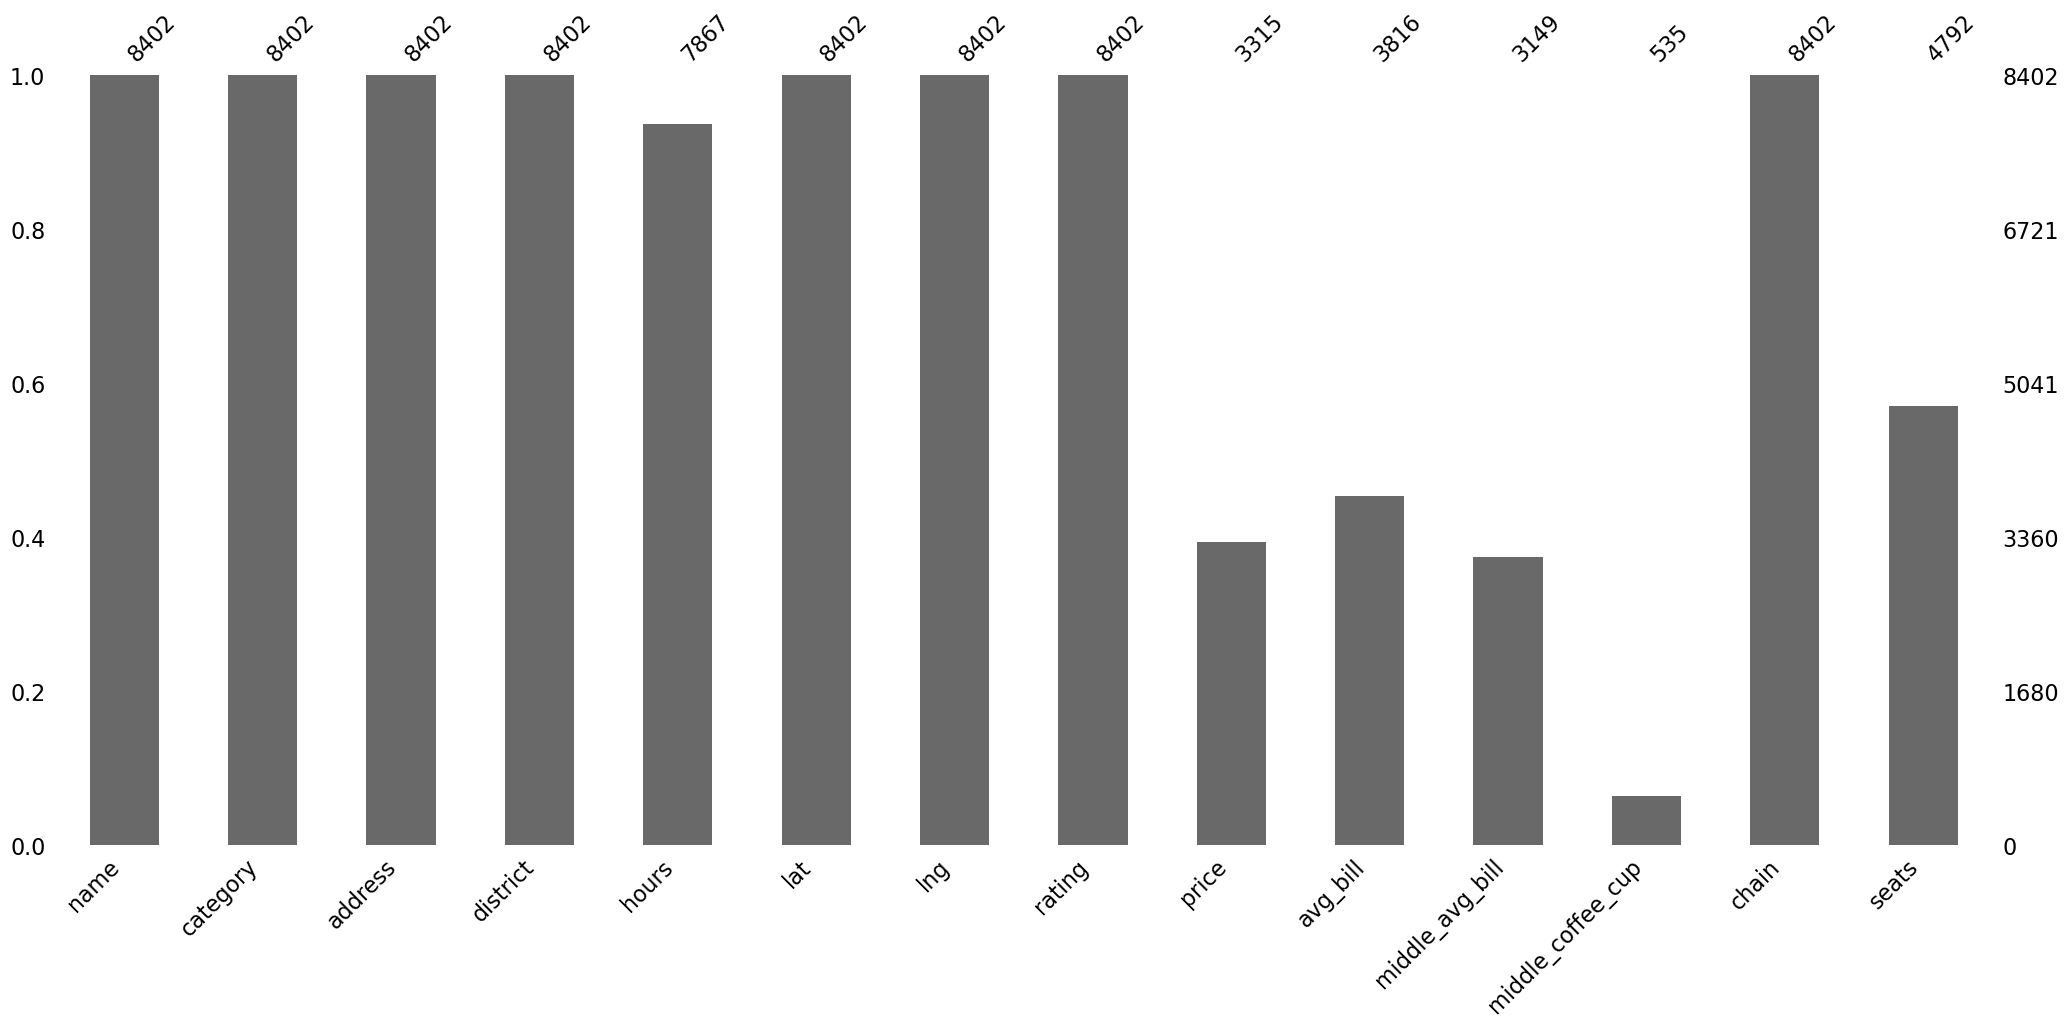

In [13]:
# Выведем столбчатую диаграмму для визуального отображения пропусков в данных
msno.bar(df);

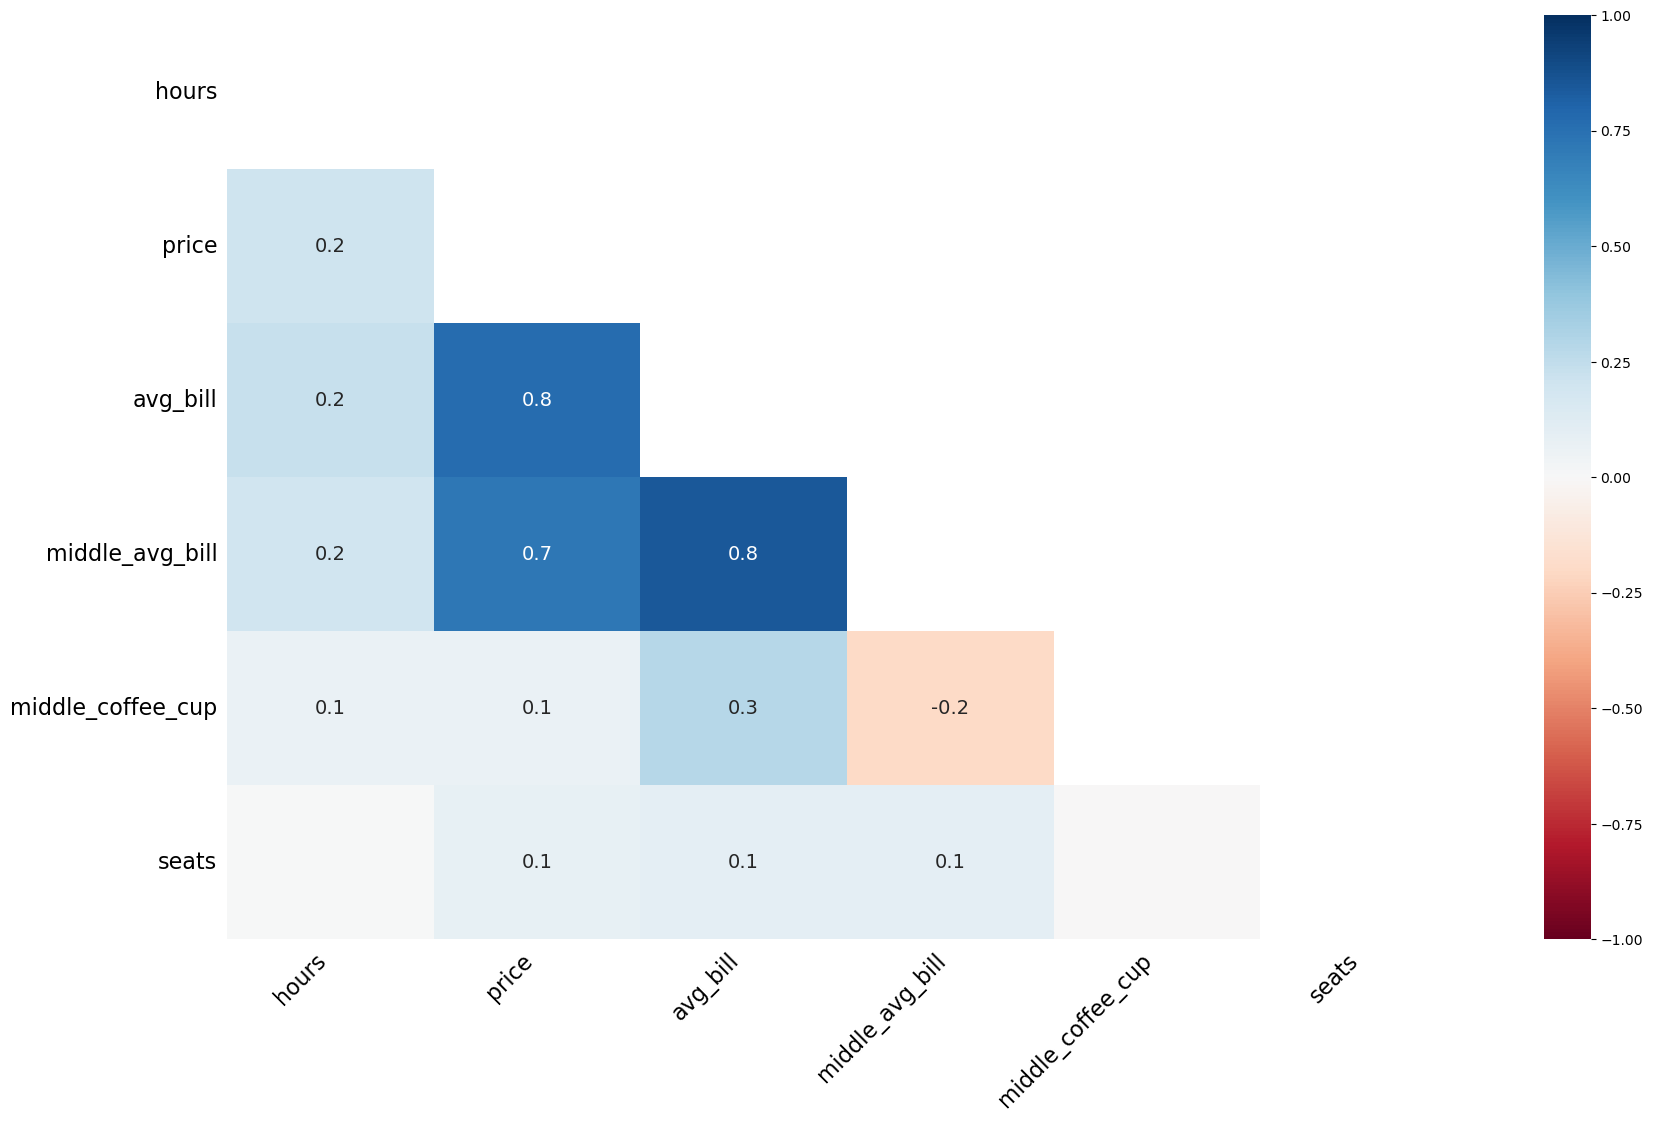

In [14]:
# Посмотрим на корреляцию пропусков
msno.heatmap(df);

---

Единственный столбец, насчёт пропусков которого имеет смысл попытаться предпринять действия, — столбец `hours`. Пропуски в остальных столбцах занимают от 43 до 94% от всех данных. Заполнить их вряд ли удастся, и удалять строки, в которых содержаться пропуски, будет ошибкой, потому что мы потеряем половину данных. Будем надеятся, что данные столбцы не сильно повлияют на ход работы.

Корреляционная матрица пропусков показала, что переменные связанные с расчётом среднего чека, являются труднодоступными для коллекционирования, поэтому в них больше всего пропусков.

---

In [15]:
# Выведем строки, в которых рабочие часы заведений неизвестны
df[df['hours'].isna()].head()

name         category                                address  \
38             ижора         булочная            москва, ижорский проезд, 5а   
40              кафе             кафе     москва, ижорская улица, 18, стр. 1   
44         кафетерий             кафе           москва, ангарская улица, 24а   
56   рыба из тандыра  быстрое питание  москва, коровинское шоссе, 46, стр. 5   
108             кафе          бар,паб      москва, мкад, 82-й километр, вл18   

                                    district hours        lat        lng  \
38           Северный административный округ   NaN  55.888366  37.514856   
40           Северный административный округ   NaN  55.895115  37.524902   
44           Северный административный округ   NaN  55.876289  37.519315   
56           Северный административный округ   NaN  55.888010  37.515960   
108  Северо-Восточный административный округ   NaN  55.908930  37.558777   

     rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
38      4.4   NaN      NaN              NaN                NaN      0    NaN  
40      3.7   NaN      NaN              NaN                NaN      0    NaN  
44      3.8   NaN      NaN              NaN                NaN      1    8.0  
56      1.5   NaN      NaN              NaN                NaN      0    NaN  
108     4.2   NaN      NaN              NaN                NaN      0    NaN

---

Есть гипотеза о том, что пропуски в столбце `hours` связаны с каким-то другим фактором в данных. Попытаемся это проверить.

---

In [16]:
# Проанализируем, как пропущенные значения в `hours` распределены по другим переменным
for column in ['category', 'district', 'chain']:
    print(df.groupby(column)['hours'].apply(lambda x: x.isnull().mean())
            .sort_values(ascending=False)
            .round(2))
    print()

category
кафе               0.16
быстрое питание    0.05
ресторан           0.04
столовая           0.03
булочная           0.03
бар,паб            0.02
кофейня            0.01
пиццерия           0.01
Name: hours, dtype: float64

district
Юго-Восточный административный округ       0.12
Северо-Западный административный округ     0.10
Восточный административный округ           0.09
Юго-Западный административный округ        0.08
Западный административный округ            0.08
Южный административный округ               0.07
Северо-Восточный административный округ    0.07
Северный административный округ            0.06
Центральный административный округ         0.01
Name: hours, dtype: float64

chain
0    0.08
1    0.04
Name: hours, dtype: float64



---

Для переменной `category` больше всего пропусков приходится на категорию "кафе" (16% пропусков от общего количества наблюдений данной категории). То есть сложнее всего собрать данные для этой категории.

Для переменной `district` больше всего пропусков приходится на категорию "Юго-Восточный административный округ" (12% пропусков от общего количества наблюдений данной категории). То есть сложнее всего собрать данные по этому округу.

Наличие или отсутствие сети заведений (`chain`) не влияет на полноту сбора информации.

Таким образом, выявить сильной зависимости наличия пропусков от других факторов в данных не получилось. Поскольку мы проверели, что пропуски в `hours` распределены относительно равномерно по отношению к другим переменным, мы можем удалить эти наблюдения без нарушения пропорций данных. Доля таких наблюдений не превышает 7%, и мы можем пожертвовать ими для создания цельного набора данных. Сопутствующим эффектом станет небольше уменьшение доли пропусков в других переменных.

---

In [17]:
# Удаляем наблюдения с пропусками в переменной `hours`
df.dropna(subset=['hours'], inplace=True)

### Работа с типами данных

---

Данные в столбцах `middle_avg_bill`, `middle_coffee_cup`, `chain` являются целочисленными, поэтому конвертируем столбцы в тип данных `int`. Столбец `chain` является примером булевой переменной, поэтому можно его также конвертировать.

---

In [18]:
# Выведем уникальные значения столбцов, чтобы принять решение о типе их данных
print(sorted(df['middle_avg_bill'].unique()))
print()
print(sorted(df['middle_coffee_cup'].unique()))
print()
print(sorted(df['seats'].unique()))

[nan, 0.0, 30.0, 50.0, 67.0, 90.0, 100.0, 107.0, 110.0, 120.0, 125.0, 130.0, 135.0, 140.0, 141.0, 150.0, 155.0, 160.0, 165.0, 167.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 199.0, 200.0, 205.0, 209.0, 210.0, 215.0, 220.0, 225.0, 229.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 261.0, 265.0, 266.0, 269.0, 270.0, 275.0, 280.0, 284.0, 285.0, 290.0, 291.0, 295.0, 298.0, 299.0, 300.0, 301.0, 304.0, 305.0, 309.0, 310.0, 313.0, 315.0, 317.0, 320.0, 321.0, 324.0, 325.0, 328.0, 330.0, 335.0, 339.0, 340.0, 343.0, 344.0, 345.0, 349.0, 350.0, 352.0, 355.0, 360.0, 362.0, 363.0, 365.0, 366.0, 370.0, 372.0, 373.0, 374.0, 375.0, 382.0, 383.0, 385.0, 387.0, 390.0, 391.0, 392.0, 395.0, 399.0, 400.0, 402.0, 404.0, 407.0, 410.0, 411.0, 412.0, 413.0, 415.0, 416.0, 420.0, 422.0, 425.0, 426.0, 430.0, 432.0, 433.0, 434.0, 435.0, 438.0, 439.0, 440.0, 441.0, 443.0, 445.0, 450.0, 453.0, 465.0, 470.0, 472.0, 475.0, 480.0, 482.0, 490.0, 495.0, 499.0, 500.0, 503.0, 508.0, 510.0, 525.0, 545.0, 549.0, 550.0,

In [19]:
# Конвертируем тип данных нескольких переменных
df['chain'] = df['chain'].astype(bool)

# тип данных следующих переменных не получится заменить, если мы оставляем пропуски в данных
try:
    df[['middle_avg_bill', 'middle_coffee_cup', 'seats']] = df[['middle_avg_bill', 'middle_coffee_cup', 'seats']].astype(int)
except:
    None

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7867 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7867 non-null   object 
 1   category           7867 non-null   object 
 2   address            7867 non-null   object 
 3   district           7867 non-null   object 
 4   hours              7867 non-null   object 
 5   lat                7867 non-null   float64
 6   lng                7867 non-null   float64
 7   rating             7867 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3808 non-null   object 
 10  middle_avg_bill    3143 non-null   float64
 11  middle_coffee_cup  534 non-null    float64
 12  chain              7867 non-null   bool   
 13  seats              4493 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 868.1+ KB


### Создание расчётных столбцов

In [21]:
# Создаём расчётный столбец с навзанием улицы
df['street'] = df['address'].str.split(', ').str[1]

---

Чтобы создать расчётный столбец, который сигнализирует о том, работает ли заведение круглосуточно, выведем все уникальные значения `hours` для понимания, на основе какого условия создавать расчётный столбец. Заодно проверим гипотезу о том, что существование 1307 уникальных режимов работы заведений неадекватно.

---

In [22]:
# Выводим уникальные значения столбца `hours`
# sorted(df['hours'].unique())

---

Предположение о том, что существование 1307 уникальных режимов работы заведений является неадекватным, не подтердилось. Действительно, значения в переменной описаны таким образом, что наличие 1307 уникальных режимов работы возможно.

---

In [23]:
# Создаём новый столбец, который сигнализирует о том, работает ли заведение круглосуточно
df['is_24/7'] = df['hours'].str.contains('ежедневно, круглосуточно')
df['is_24/7'] = df['is_24/7'].astype(bool)

## Выводы по первой части

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7867 entries, 0 to 8405
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7867 non-null   object 
 1   category           7867 non-null   object 
 2   address            7867 non-null   object 
 3   district           7867 non-null   object 
 4   hours              7867 non-null   object 
 5   lat                7867 non-null   float64
 6   lng                7867 non-null   float64
 7   rating             7867 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3808 non-null   object 
 10  middle_avg_bill    3143 non-null   float64
 11  middle_coffee_cup  534 non-null    float64
 12  chain              7867 non-null   bool   
 13  seats              4493 non-null   float64
 14  street             7867 non-null   object 
 15  is_24/7            7867 non-null   bool   
dtypes: bool(2), float64(6), objec

Мы изучили общую информацию о данных и выяснили, что:

- Данные соответствуют описанию.
- В следующих столбцах обнаружены пропуски: `hours`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`, `seats`.
- Столбцы, типы данных которых требуют уточнения: `middle_avg_bill`, `middle_coffee_cup`, `chain`, `seats`.
- В столбце `name` есть дубликаты, которые, гипотетически, связаны с наличием сетевых заведений с одинаковым названием. Однако нельзя исключать возможность встретить одно и то же название для разных заведений, поскольку нет указания на то, что данные беруется из ЕГРЮЛ с юридической точностью.
- В столбце `category` есть категории со схожими функциями: булочная, кафе, кофейня. Вряд ли это помешает анализу, но это необходимо отметить.
- В столбце `address` есть дубликаты, которые объясняются тем, что в одном здании может быть несколько несвязанных друг с другом заведений.
- В столбце `disctrict` представлены 9 административных округов Москвы. С 2012 год их 12; не хватает Зеленоградского, Новомосковского и Троицкого округов. Взяты только те округа, которые концентрируются радиально вокруг центра города.
- В столбце `hours` есть 1307 уникальных значений, что кажется неверным, ведь разнообразие графика работы заведений не может быть таким большим. Пропуски составляют 6% данных столбца. В дальнейшем, предположение о том, что существование 1307 уникальных режимов работы заведений является неадекватным, не подтердилось. Действительно, значения в переменной описаны таким образом, что наличие стольких уникальных режимов работы возможно.
- В столбцах `lat`, `lng` есть дубликаты, которые объясняются тем, что на одной долготе или широте может находится несколько не связанных друг с другом заведений.
- В столбце `rating` 41 уникальная оценка, и в этом нет ничего необычного.
- В столбце `price` 4 категории в соответствии с описанием. Пропуски составляют 61% значений.
- В столбцах `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` мало уникальных значений и 55, 63 и 94% пропусков соответственно.
- В столбце `chain` задана булева переменная в соответствии с описанием.
- В столбце `seats` 229 уникальных значений и 43% пропусков.

Проанализировав пропуски, мы сделали следующие выводы:

- Единственный столбец, насчёт пропусков которого имеет смысл попытаться предпринять действия, — столбец `hours`. Пропуски в остальных столбцах занимают от 43 до 94% от всех данных. Заполнить их вряд ли удастся, и удалять строки, в которых содержаться пропуски, будет ошибкой, потому что мы потеряем половину данных. Будем надеятся, что данные столбцы не сильно повлияют на ход работы.
- Корреляционная матрица пропусков показала, что переменные связанные с расчётом среднего чека, являются труднодоступными для коллекционирования, поэтому в них больше всего пропусков.
- Есть гипотеза о том, что пропуски в столбце `hours` связаны с каким-то другим фактором в данных.
    - Для переменной `category` больше всего пропусков приходится на категорию "кафе" (16% пропусков от общего количества наблюдений данной категории). То есть сложнее всего собрать данные для этой категории.
    - Для переменной `district` больше всего пропусков приходится на категорию "Юго-Восточный административный округ" (12% пропусков от общего количества наблюдений данной категории). То есть сложнее всего собрать данные по этому округу.
    - Наличие или отсутствие сети заведений (`chain`) не влияет на полноту сбора информации.
    - Таким образом, выявить сильной зависимости наличия пропусков от других факторов в данных не получилось. Поскольку мы проверели, что пропуски в `hours` распределены относительно равномерно по отношению к другим переменным, мы можем удалить эти наблюдения без нарушения пропорций данных. Доля таких наблюдений не превышает 7%, и мы можем пожертвовать ими для создания цельного набора данных. Сопутствующим эффектом станет небольше уменьшение доли пропусков в других переменных.

Также были проанализированы и изменены типы данных и созданы расчётные столбцы для дальнейшей работы.

## 2. Анализ данных

Анализ данных будет проведён в формате ответов на вопросы бизнеса.

### Распределение заведений по категориям

*Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.*

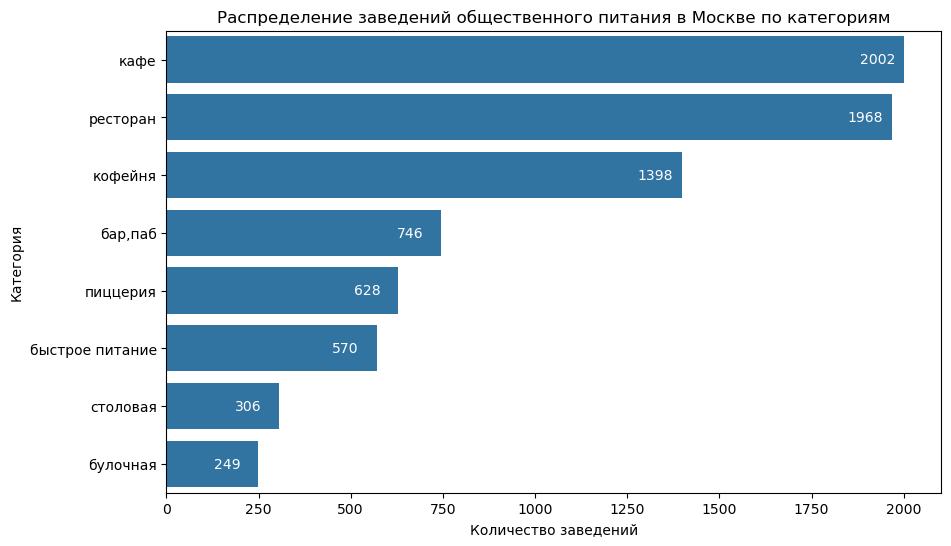

In [25]:
# Создадим столбчатую диаграмму для отображения количества объектов общественного питания по категориям
seats_by_category = df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=seats_by_category.values,
            y=seats_by_category.index)
plt.title('Распределение заведений общественного питания в Москве по категориям')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')


# Добавим подписи внутри столбцов
for i in range(len(seats_by_category)):
    plt.text(seats_by_category.values[i] - (0.06 * max(seats_by_category.values)),
             i,
             str(seats_by_category.values[i]),
             va='center',
             color='white')

Text(0.5, 1.0, 'Доли категорий заведений общественного питания в Москве')

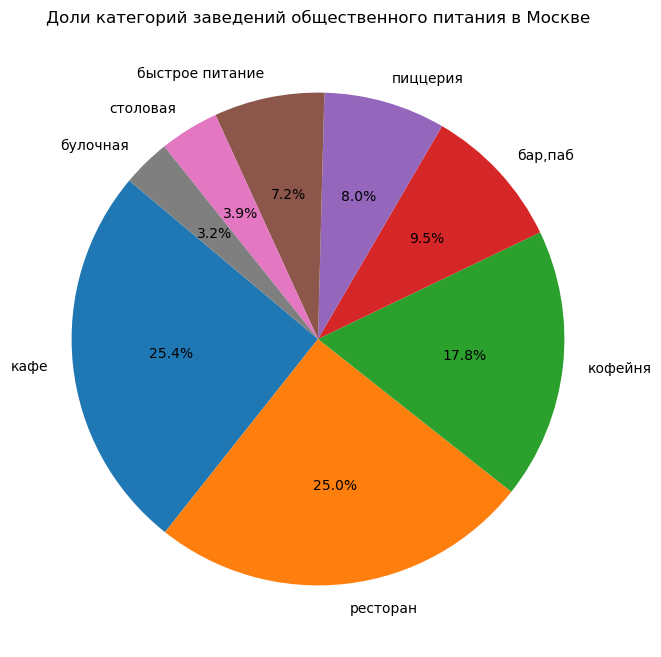

In [26]:
# Создадим круговую диаграмму для отображения долей категорий заведений
plt.figure(figsize=(8, 8))
plt.pie(seats_by_category,
        labels=seats_by_category.index, 
        autopct='%1.1f%%',
        startangle=140)
plt.title('Доли категорий заведений общественного питания в Москве')
# plt.savefig('pie.png')

---

Краткий вывод по анализу количества и долей заведений общественного питания по категориям в Москве:

1. Доминирование кафе: Кафе являются наиболее распространенной категорией, что может указывать на высокий спрос на такой формат заведений в Москве. Рестораны и кофейни также занимают значительную долю, подчеркивая популярность этих типов заведений.

2. Меньшее представление баров и пиццерий: Бары и пиццерии представлены в меньшем количестве, что может свидетельствовать о более нишевом или специализированном секторе рынка.

3. Важность категории для выбора инвестиций: Данные по распределению категорий могут быть полезны для инвесторов при выборе типа заведения для инвестиций. Необходимо учитывать как популярность определенных категорий, так и уровень конкуренции в них.

---

### Количество посадочных мест по категориям

*Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.*

In [27]:
# Рассчитаем статистики по количеству посадочных мест для каждой категории
df.groupby('category')['seats'].describe()

count        mean         std  min    25%   50%    75%  \
category                                                                   
бар,паб           455.0  121.808791  135.490448  0.0  47.50  82.0  146.5   
булочная          146.0   90.054795   98.185804  0.0  25.00  50.0  120.0   
быстрое питание   324.0  100.453704  108.691718  0.0  27.25  69.5  150.0   
кафе             1027.0   94.283350  109.119409  0.0  35.00  60.0  106.0   
кофейня           745.0  111.665772  128.225554  0.0  40.00  80.0  145.0   
пиццерия          423.0   94.621749  112.757630  0.0  30.00  55.0  120.0   
ресторан         1215.0  121.404938  119.638220  0.0  48.00  86.0  150.0   
столовая          158.0   99.740506  124.884261  0.0  40.00  73.5  115.0   

                    max  
category                 
бар,паб          1288.0  
булочная          625.0  
быстрое питание  1040.0  
кафе             1288.0  
кофейня          1288.0  
пиццерия         1288.0  
ресторан         1288.0  
столовая         1200.0

---

В первую очередь надо разобраться, почему некоторые заведения обладают такой большой вместимостью. Заметим, что вместимость, близкая к 1000 мест, возможна, но присуща в основном банкетным залам, а не кофейням.

---

In [28]:
# Посмотрим на заведения вместимостью более 900 человек
df[df['seats'] > 900].sort_values(by='seats')

name         category  \
4180              eataly          бар,паб   
4245      стейк & бургер             кафе   
2713         ваня и гоги          бар,паб   
2722           маргарита  быстрое питание   
2770         шоколадница          кофейня   
4231  рестобар argomento         столовая   
6518         delonixcafe         ресторан   
6524           ян примус         ресторан   
6574              мюнгер         пиццерия   
6641    one price coffee          кофейня   
6658              гудбар          бар,паб   
6807  loft-cafe академия             кафе   
6808        яндекс лавка         ресторан   
6838  alternative coffee          кофейня   

                                         address  \
4180                   москва, киевская улица, 2   
4245                   москва, киевская улица, 2   
2713     москва, измайловское шоссе, 71, корп. а   
2722     москва, измайловское шоссе, 71, корп. а   
2770     москва, измайловское шоссе, 71, корп. а   
4231    москва, кутузовский проспект, 41, стр. 1   
6518   москва, проспект вернадского, 94, корп. 1   
6524  москва, проспект вернадского, 121, корп. 1   
6574   москва, проспект вернадского, 97, корп. 1   
6641    москва, проспект вернадского, 84, стр. 1   
6658   москва, проспект вернадского, 97, корп. 1   
6807    москва, проспект вернадского, 84, стр. 1   
6808    москва, проспект вернадского, 51, стр. 1   
6838    москва, проспект вернадского, 41, стр. 1   

                              district  \
4180   Западный административный округ   
4245   Западный административный округ   
2713  Восточный административный округ   
2722  Восточный административный округ   
2770  Восточный административный округ   
4231   Западный административный округ   
6518   Западный административный округ   
6524   Западный административный округ   
6574   Западный административный округ   
6641   Западный административный округ   
6658   Западный административный округ   
6807   Западный административный округ   
6808   Западный административный округ   
6838   Западный административный округ   

                                                  hours        lat        lng  \
4180                             ежедневно, 12:00–23:00  55.743405  37.562535   
4245                             ежедневно, 09:00–21:00  55.742953  37.561872   
2713                             ежедневно, 11:00–06:00  55.789842  37.750282   
2722                             ежедневно, 10:00–22:00  55.789527  37.752004   
2770  пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...  55.789903  37.749822   
4231                             ежедневно, 12:00–23:00  55.738237  37.531819   
6518                           ежедневно, круглосуточно  55.652577  37.475730   
6524  пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...  55.657166  37.481519   
6574               пн-пт 08:00–21:00; сб,вс 10:00–21:00  55.667505  37.491001   
6641                             ежедневно, 08:30–20:00  55.665129  37.478635   
6658               пн-пт 11:00–23:00; сб,вс 13:00–23:00  55.667327  37.490601   
6807                  пн-пт 09:00–20:00; сб 09:00–16:00  55.665142  37.478603   
6808                           ежедневно, круглосуточно  55.672580  37.507753   
6838               пн-пт 09:00–21:00; сб,вс 09:00–22:00  55.673128  37.502992   

      rating          price                  avg_bill  middle_avg_bill  \
4180     4.6            NaN                       NaN              NaN   
4245     4.2            NaN                       NaN              NaN   
2713     4.2        высокие  Средний счёт:1000–2500 ₽           1750.0   
2722     4.3            NaN                       NaN              NaN   
2770     4.1            NaN                       NaN              NaN   
4231     4.2        высокие  Средний счёт:2500–5000 ₽           3750.0   
6518     4.1        высокие  Средний счёт:1500–2000 ₽           1750.0   
6524     4.5  выше среднего       Средний счёт:1500 ₽           1500.0   
6574     4.8            NaN                       

---

Этот срез показал, что мы имеем дело в том числе с синтетическими данными: все заведения с 1288 посадочных мест находятся на пр. Вернадского, есть ресторан "Яндекс Лавка" на 1288 мест. Вряд ли это тот случай, когда приписывают лишний нуль, потому что на третьем месте в числе стояла бы цифра 0. Также заведение может находится в фуд-корте, где ему теоретически могли приписать вместимость всего фуд-корта, но тогда у него должен полностью совпадать адрес и частично время работы. У двух пар заведений адрес совпадает, но он вряд ли может совпадать между этими парами. Время работы также разное.

Остальные заведения в этом списке также могут принести больше вреда, чем пользы. Я считаю, что в наблюдениях, у которых посадочных мест больше 900, нужно количество мест заменить на `NaN`. Мы можем совершить ещё итерации для избавления от выбросов, но, поскольку данные синтетические, это будет всё равно нецелесообразно.

---

In [29]:
# Отфильтруем датафрейм по количеству посадочных мест
df.loc[df['seats'] > 900, 'seats'] = np.nan

In [30]:
# Повторно рассчитаем статистики по количеству посадочных мест для каждой категории
display(df.groupby('category')['seats'].describe())

count        mean         std  min    25%   50%    75%  \
category                                                                   
бар,паб           452.0  115.431416  110.188398  0.0  46.75  81.0  141.5   
булочная          146.0   90.054795   98.185804  0.0  25.00  50.0  120.0   
быстрое питание   323.0   97.544892   95.397275  0.0  26.50  69.0  146.5   
кафе             1025.0   92.313171   99.342971  0.0  35.00  60.0  105.0   
кофейня           742.0  107.243935  107.661042  0.0  40.00  80.0  144.0   
пиццерия          422.0   91.793839   96.714447  0.0  30.00  53.5  120.0   
ресторан         1212.0  118.517327  104.732811  0.0  48.00  86.0  150.0   
столовая          157.0   92.732484   88.806285  0.0  40.00  72.0  112.0   

                   max  
category                
бар,паб          660.0  
булочная         625.0  
быстрое питание  500.0  
кафе             650.0  
кофейня          650.0  
пиццерия         625.0  
ресторан         650.0  
столовая         625.0

---

Мы видим, что среднее арифметическое значение сильно больше медианного для всех категорий, что говорит об асимметричности данных, от которой мы частично избавились. Обобщая, в среднем около 50% заведений во всех категориях вмещают от 20-50 до 100-150 гостей.

---

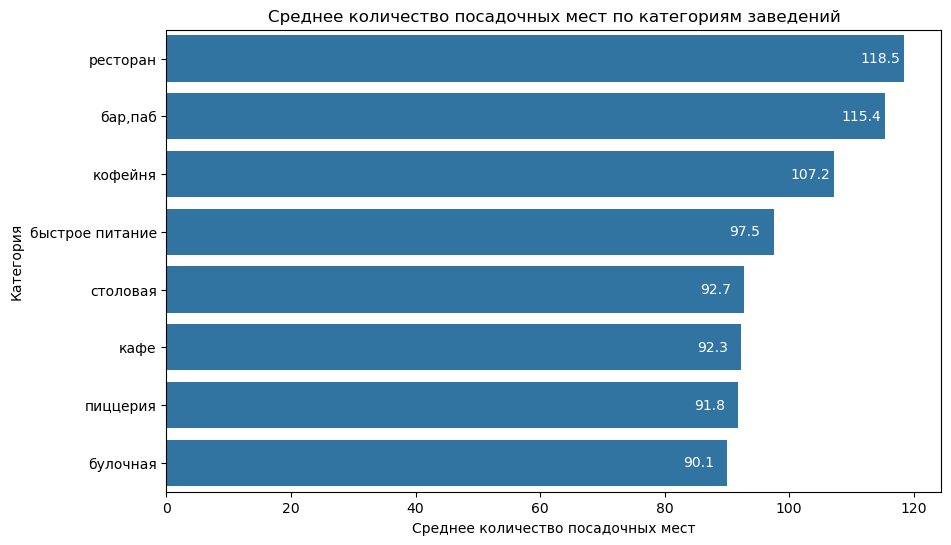

In [31]:
# Отсортируем категории заведений по среднему количеству посадчоных мест
mean_seats_by_category = (df.groupby('category')['seats']
                          .mean()
                          .sort_values(ascending=False))

# Создадим столбчатую диаграмму для отображения среднего количества посадочных мест по категориям заведений
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_seats_by_category.values,
            y=mean_seats_by_category.index)
plt.title('Среднее количество посадочных мест по категориям заведений')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Категория')

# Добавим подписи внутри столбцов
for i in range(len(mean_seats_by_category)):
    plt.text(mean_seats_by_category.values[i] - (0.06 * max(mean_seats_by_category.values)),
             i, 
             f'{round(mean_seats_by_category.values[i], 1)}',
             va='center',
             color='white')
# plt.savefig('avg_seats_by_category.png', bbox_inches='tight')

---

В среднем, больше всего посадочных мест у ресторанов, баров и пабов, и кофеен. Меньше всего, ожидаемо у булочных, которые чаще могут работать на вынос.

---

Text(0, 0.5, 'Категория')

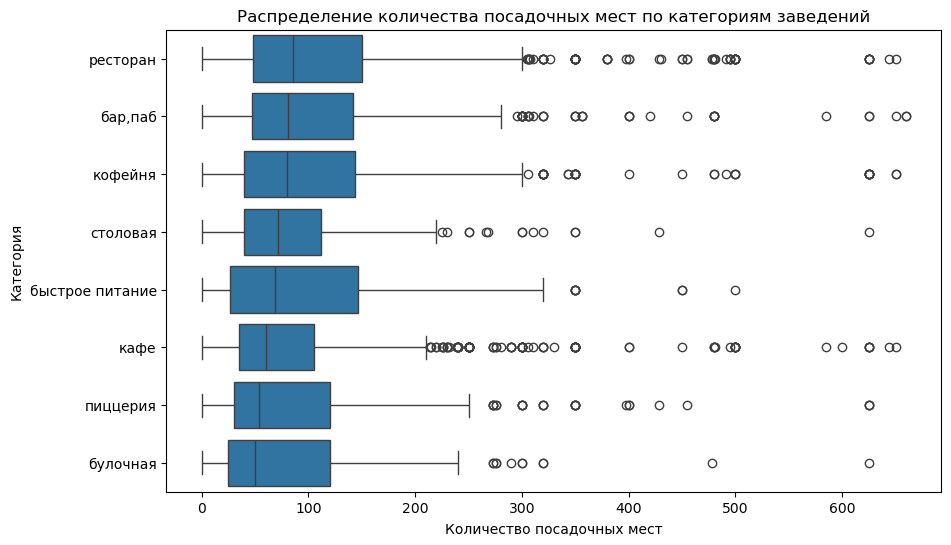

In [32]:
# Отсортируем категории по убыванию медианы переменной `seats`
sorted_categories_by_seats_median = (df.groupby('category')['seats']
                                     .median()
                                     .sort_values(ascending=False)
                                     .index)

# Построим "ящик с усами" для каждой категории заведений
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            y='category',
            x='seats',
            order=sorted_categories_by_seats_median)
plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория')
# plt.savefig('boxplot.png')

---

Самый большой разброс посадочных мест у категории быстрого питания — 50% заведений вмещают себя от 26.5 до 146.5 человек. Самый маленький разброс посадочных мест у категории кафе — 50% заведений вмещают себя от 35 до 105 гостей.

---

### Соотношение сетевых и несетевых заведений, в т. ч. по категориям

*Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?*

*Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.*

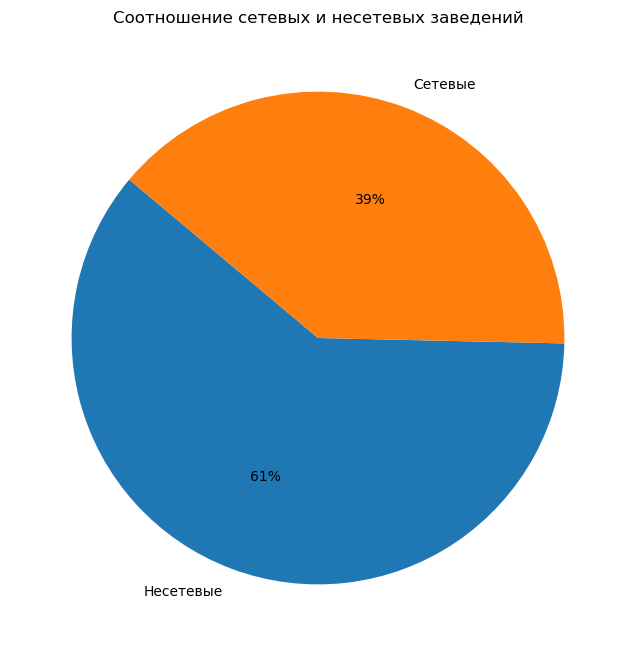

In [33]:
# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(df['chain'].value_counts().values,
        labels=['Несетевые', 'Сетевые'],
        autopct='%1.0f%%',
        startangle=140)
plt.title('Соотношение сетевых и несетевых заведений');

---

Соотношение сетевых и несетевых заведений — 39 к 61%, соответственно.

---

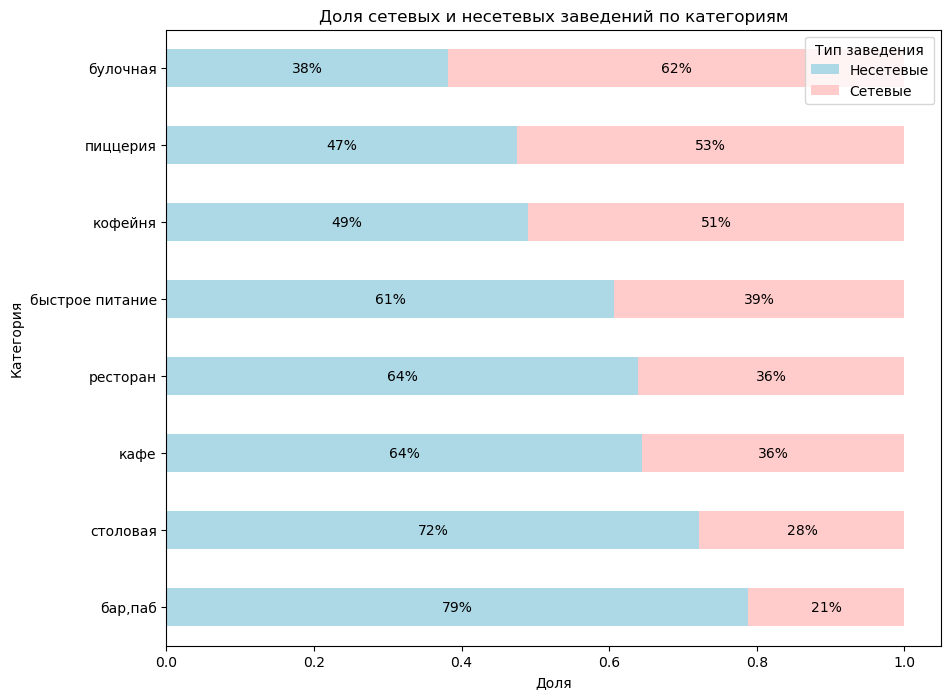

In [34]:
# Подсчитаем количество сетевых и несетевых заведений по категориям
chain_distribution = df.groupby('category')['chain'].value_counts(normalize=True).unstack()

# Переименуем столбцы, чтобы на них можно было ссылаться
chain_distribution.columns = ['non_chain', 'chain']

# Отсортируем категории
sorted_categories = chain_distribution['chain'].sort_values(ascending=True).index

# Создадим горизонтальный stacked bar chart

fig, ax = plt.subplots(figsize=(10, 8))
chain_distribution.loc[sorted_categories].plot(kind='barh', stacked=True, color=['#add8e6', '#ffcccb'], ax=ax)

# Добавление значений внутри сегментов столбцов
for i, (non_chain, chain) in enumerate(zip(chain_distribution.loc[sorted_categories, 'non_chain'],
                                           chain_distribution.loc[sorted_categories, 'chain'])):
    ax.text(non_chain/2,
            i,
            f'{non_chain:.0%}',
            va='center',
            ha='center',
            color='black')
    ax.text(non_chain + chain/2,
            i,
            f'{chain:.0%}',
            va='center',
            ha='center',
            color='black')

plt.title('Доля сетевых и несетевых заведений по категориям')
plt.xlabel('Доля')
plt.ylabel('Категория')
plt.legend(['Несетевые', 'Сетевые'], title='Тип заведения')
# plt.savefig('chain_share.png')

---

Наибольшая доля сетевых заведений наблюдается у булочных — 62%. У баров и пабов меньше всего сетевых заведений — 21%.

- **Больше сетевых заведений** наблюдаются в категории: булочная.
- **Сопоставимое соотношение сетевых и несетевых заведений** наблюдается в категориях: пиццерия и кофейня.
- **Больше несетевых заведений** наблюдается в категортиях: быстрое питание, ресторан, кафе, столовая, бар, паб.

---

### Топ-15 сетевых заведений по количеству заведений

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'шоколадница'),
  Text(1, 0, "домино'с пицца"),
  Text(2, 0, 'додо пицца'),
  Text(3, 0, 'one price coffee'),
  Text(4, 0, 'яндекс лавка'),
  Text(5, 0, 'cofix'),
  Text(6, 0, 'prime'),
  Text(7, 0, 'кофепорт'),
  Text(8, 0, 'хинкальная'),
  Text(9, 0, 'кулинарная лавка братьев караваевых'),
  Text(10, 0, 'теремок'),
  Text(11, 0, 'cofefest'),
  Text(12, 0, 'буханка'),
  Text(13, 0, 'чайхана'),
  Text(14, 0, 'му-му')])

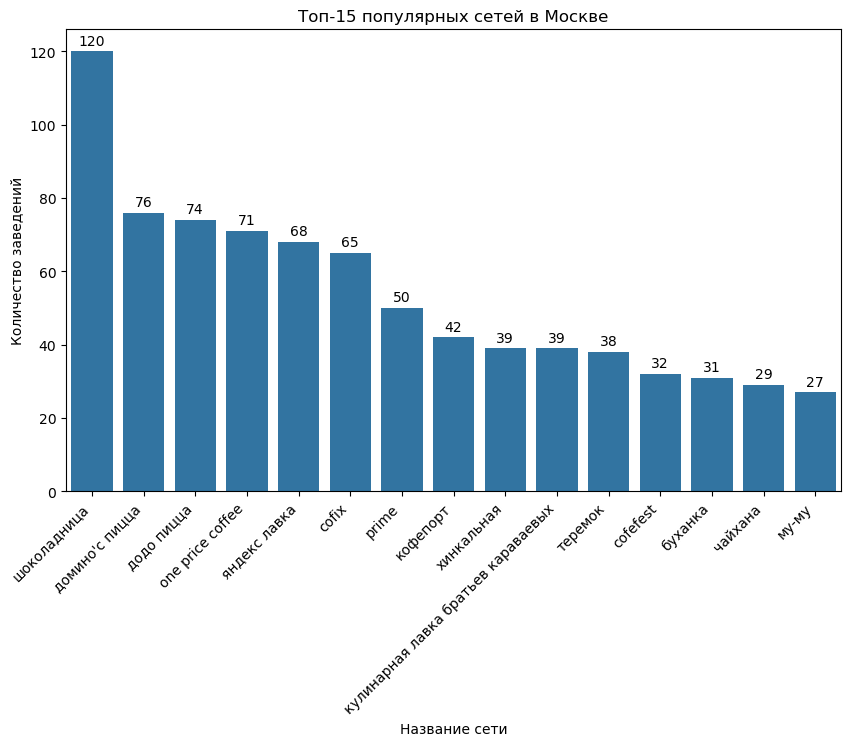

In [35]:
# Сгруппируем данные по названиям заведений для сетевых заведений
popular_chains = df[df['chain'] == 1]['name'].value_counts().head(15)

# Создадим столбчатую диаграмму для топ-15 популярных сетей
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=popular_chains.index,
                 y=popular_chains.values)

# Добавим метки
for i, value in enumerate(popular_chains.values):
    ax.text(i,
            value + 1,
            str(value),
            ha='center',
            va='bottom',
            color='black')

plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
# plt.savefig('top15_chains.png', bbox_inches='tight')

---

Больше всего заведений У "Шоколадницы". Далее идут сети пиццерий — "Домино'с Пицца" и "Додо Пицца".

---

In [36]:
# Сначала найдем топ-15 сетевых заведений
popular_chains_list = popular_chains.index.tolist()

# Сгруппируем данные по этим сетям и категориям, чтобы узнать, к каким категориям они относятся
top_chains_categories = (df[df['name'].isin(popular_chains_list)]
                         .groupby(['name', 'category'])
                         .size()
                         .reset_index(name='count'))

# Отсортируем данные по названию сети и количеству заведений
top_chains_categories = top_chains_categories.sort_values(['name', 'count'], ascending=[True, False])

# Так как нам интересна только самая частая категория для каждой сети, оставим первую запись для каждой сети
top_chains_categories.groupby('name').first().sort_values('count', ascending=False)

category  count
name                                                
шоколадница                           кофейня    119
домино'с пицца                       пиццерия     77
додо пицца                           пиццерия     74
one price coffee                      кофейня     72
яндекс лавка                         ресторан     68
cofix                                 кофейня     65
prime                                ресторан     49
кофепорт                              кофейня     42
кулинарная лавка братьев караваевых      кафе     39
теремок                              ресторан     36
cofefest                              кофейня     31
буханка                              булочная     24
чайхана                                  кафе     19
хинкальная                               кафе     16
му-му                                    кафе     12

---

Общих закономерностей в том, какие категории заведений являются самыми популярными по количеству завдедений, нет: 5 кофеен, 2 пиццерии, 3 ресторана, 4 кафе, 1 булочная. Заметим, что не все заведения одной сети принадлежат к одной категории заведений. Скорее всего, это ошибка сбора данных.

---

### Распределение заведений по административным округам

*Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.*

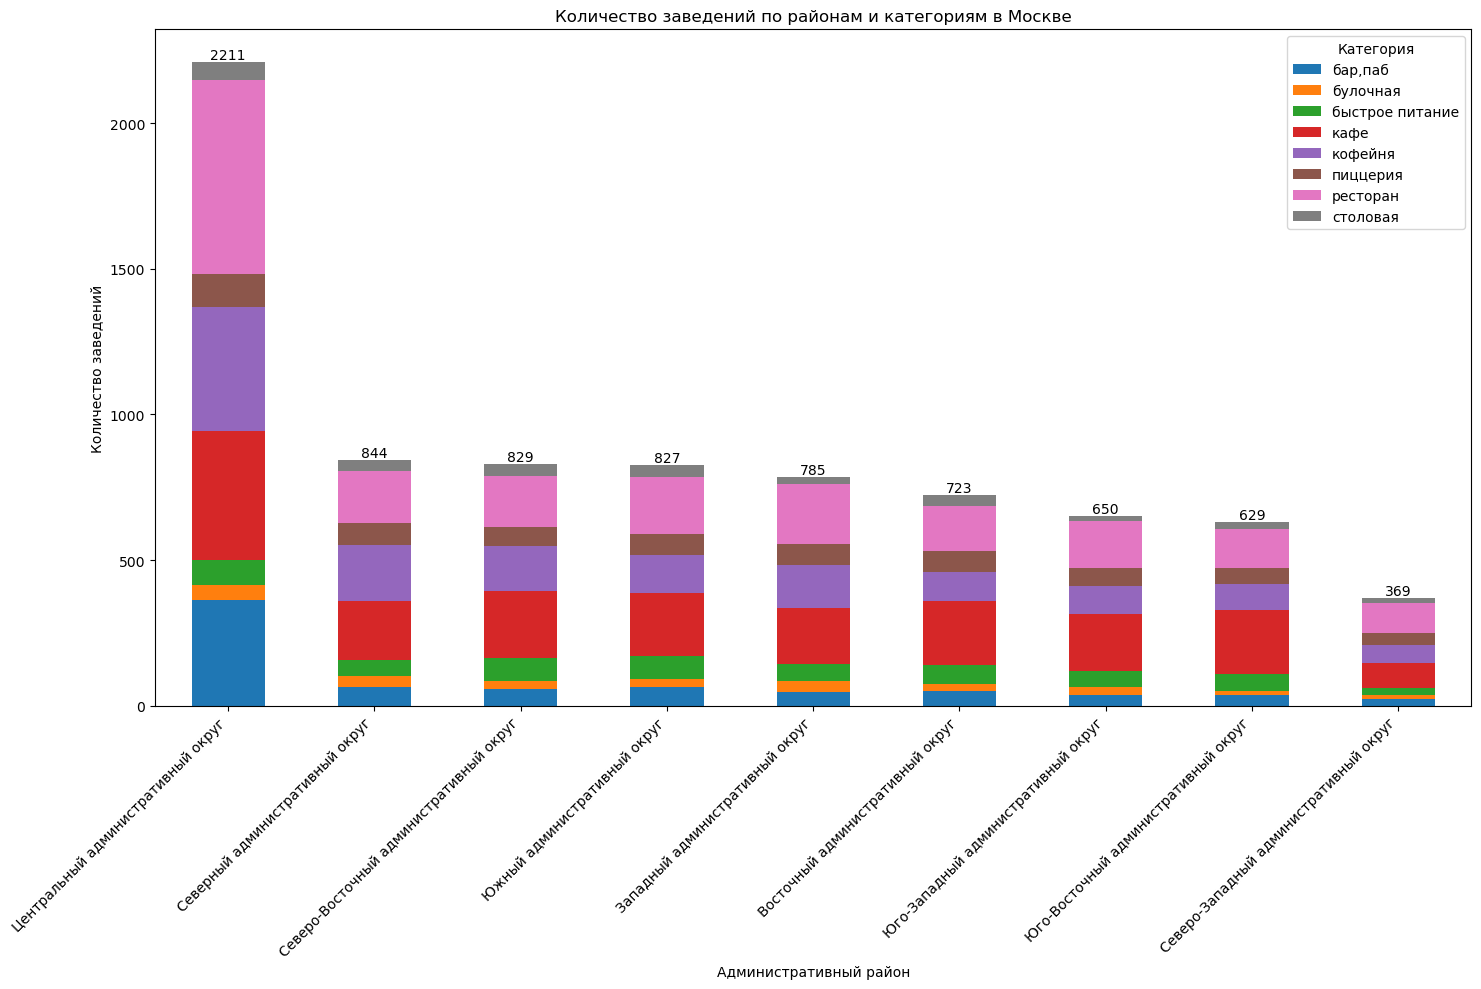

In [37]:
# Сгруппируем данные по районам и категориям, подсчитаем количество заведений в каждой группе
district_category_counts = df.groupby(['district', 'category']).size().unstack(fill_value=0)

# Просуммируем количество заведений по каждому району и отсортируем данные по общему количеству заведений в районе
district_category_counts['Total'] = district_category_counts.sum(axis=1)
district_category_counts = district_category_counts.sort_values(by='Total', ascending=False)

# Создадим график
fig, ax = plt.subplots(figsize=(15, 10))
district_category_counts.drop('Total', axis=1).plot(kind='bar', stacked=True, ax=ax)

# Добавим метки
for i, (index, row) in enumerate(district_category_counts.iterrows()):
    ax.text(i,
            row['Total'],
            str(row['Total']),
            ha='center',
            va='bottom')
    
ax.set_title('Количество заведений по районам и категориям в Москве')
ax.set_xlabel('Административный район')
ax.set_ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория')
plt.tight_layout()
# plt.savefig('categories_by_district.png')

---

Больше всего заведений в выборку попало по ЦАО — более чем в 2.5 раза больше, чем в идущий на втором месте САО и чуть меньше, чем округа, занявшие 2-4 места, вместе взятые. Меньше всего заведений представлено в выборке по СЗАО.

Важное наблюдение: соотношение кофеен и кафе только в ЦАО является сопоставимым. В остальных округах кафе больше, чем кафеен. Доля баров и пабов в центре города также больше, чем в остальных округах.

---

### Средний рейтинг заведений по категориям

Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

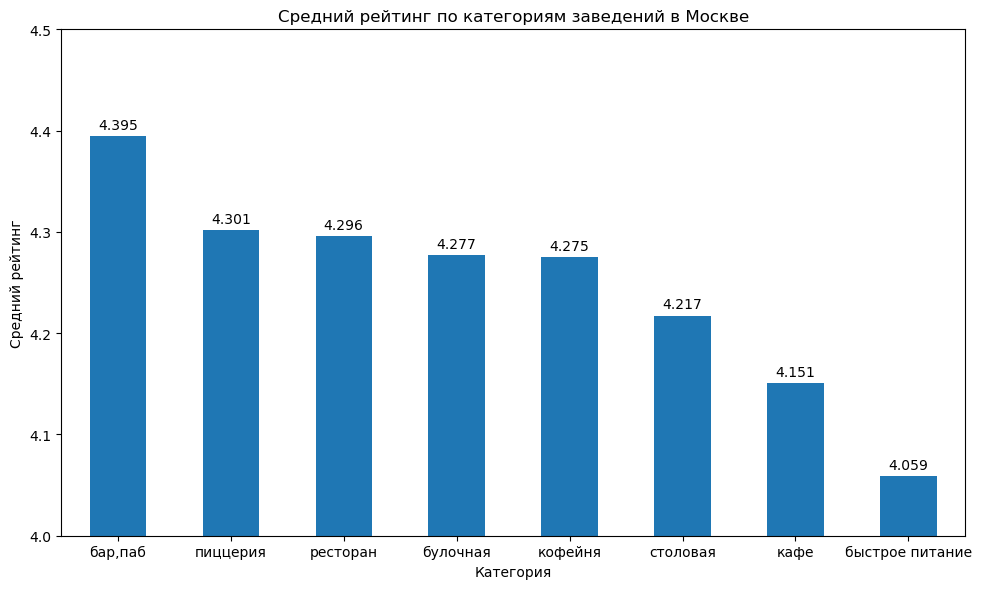

In [38]:
# Рассчитаем средний рейтинг для каждой категории заведений
category_avg_ratings = df.groupby('category')['rating'].mean()

# Создадим график
fig, ax = plt.subplots(figsize=(10, 6))
bars = category_avg_ratings.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_title('Средний рейтинг по категориям заведений в Москве')
ax.set_xlabel('Категория')
ax.set_ylabel('Средний рейтинг')
ax.set_ylim(4, 4.5)

# Добавляем метки данных
for bar in bars.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('avg_rating.png')

---

Средний рейтинг выше всего у баров и пабов. Это может объясняться тем, что в баре у людей наилучшее настроение из-за употребления алкоголя. Худший средний рейтинг у заведений быстрого питания. Это может объясняться тем, что качество сервиса и продуктов там, скорее всего, самое низкое.

---

### Фоновая картограмма с рейтингом заведений по округам

*Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.*

*Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки `folium`.*

In [39]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создадим карту Москвы
moscow_map = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

In [40]:
# Сгруппируем данные по среднему рейтингу в каждом районе
rating_df = df.groupby('district', as_index=False)['rating'].agg('mean').sort_values('rating', ascending=False)
rating_df

district    rating
5       Центральный административный округ  4.379285
2          Северный административный округ  4.254976
4   Северо-Западный административный округ  4.237398
1          Западный административный округ  4.194140
7      Юго-Западный административный округ  4.191077
0         Восточный административный округ  4.189212
8             Южный административный округ  4.188634
3  Северо-Восточный административный округ  4.160314
6     Юго-Восточный административный округ  4.124324

In [41]:
# Создадим хороплет с помощью конструктора Choropleth и добавим его на карту
Choropleth(
    geo_data=geo_json,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(moscow_map)

moscow_map

---

Интерактивная карта демонстрирует количество заведений по округам: чем темнее закрашен округ, тем больше в нём заведений.

---

In [ ]:
# Cоздадим пустой кластер и добавим его на карту
marker_cluster = MarkerCluster().add_to(moscow_map)

# Используем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)
    
# Применим функцию create_clusters() к каждой строке датафрейма
df.apply(create_clusters, axis=1)

moscow_map

---

На карту были добавлены все заведения с помощью динамической кластеризации. Наивысший рейтинг показывают заведения в ЦАО, далее САО и СЗАО. Заметно низкие рейтинги показывают заведения из ЮВАО.

Замечание: кластеры не распределены по округам.

---

### Топ-15 улиц по количеству заведений

*Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.*

In [ ]:
# Найдём топ-15 улиц по количеству заведений
top_streets = df['street'].value_counts().head(15)
top_streets_list = top_streets.index.tolist()

# Отфильтруем данные по топ-15 улицам
top_streets_df = df[df['street'].isin(top_streets_list)]

# Сгруппируем данные по улицам и категориям
street_category_counts = top_streets_df.groupby(['street', 'category']).size().unstack(fill_value=0)

# Просуммируем количество заведений по каждой улице и отсортируем данные по общему количеству заведений на улице
street_category_counts['Total'] = street_category_counts.sum(axis=1)
sorted_street_category_counts = street_category_counts.sort_values(by='Total', ascending=False)

# Создадим график
fig, ax = plt.subplots(figsize=(15, 10))
sorted_street_category_counts.drop('Total', axis=1).plot(kind='bar', stacked=True, ax=ax)

# Добавляем метки данных к общему количеству заведений на улице
for i, total in enumerate(sorted_street_category_counts['Total']):
    ax.text(i,
            total,
            str(total),
            ha='center',
            va='bottom')

ax.set_title('Распределение количества заведений и их категорий по топ-15 улицам Москвы')
ax.set_xlabel('Улица')
ax.set_ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.tight_layout()
# plt.savefig('top15_streets.png')

---

Больше всего заведений находится на пр. Мира, ул. Профсоюзной, пр. Вернадского, пр. Ленинском и пр. Ленинградском. Далее следуют Дмитровское, Каширское, Варшавское и Ленинградское шоссе.

---

### Улицы с одним заведением

*Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?*

In [ ]:
# Находим улицы с одним объектом общепита
streets_with_one_spot = df['street'].value_counts()
streets_with_one_spot = streets_with_one_spot[streets_with_one_spot == 1].index.tolist()

# Фильтруем данные, чтобы оставить только те заведения, что расположены на этих улицах
streets_with_one_spot_df = df[df['street'].isin(streets_with_one_spot)]

# Анализируем данные об этих заведениях
streets_with_one_spot_df.sort_values(by='street')

---

Для нахождения закономерностей среди улиц с одним заведением, применим проделанные выше приёмы к датафрейму с такими улицами.

---

In [ ]:
# Создадим столбчатую диаграмму для отображения количества объектов общественного питания по категориям
seats_by_category_one_spot = streets_with_one_spot_df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=seats_by_category_one_spot.values,
            y=seats_by_category_one_spot.index)
plt.title('Распределение заведений общественного питания в Москве по категориям (улицы с 1 заведением)')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')

# Добавим подписи внутри столбцов
for i in range(len(seats_by_category_one_spot)):
    plt.text(seats_by_category_one_spot.values[i] - (0.06 * max(seats_by_category_one_spot.values)),
             i,
             str(seats_by_category_one_spot.values[i]),
             va='center',
             color='white')

---

72% "одиноких" заведений являются либо кафе, либо кофейней, либо рестораном.

---

In [ ]:
# Отсортируем категории по убыванию медианы переменной `seats`
sorted_categories_by_seats_median_one_spot = (streets_with_one_spot_df.groupby('category')['seats']
                                                                      .median()
                                                                      .sort_values(ascending=False)
                                                                      .index)

# Построим "ящик с усами" для каждой категории заведений
plt.figure(figsize=(10, 6))
sns.boxplot(data=streets_with_one_spot_df,
            y='category',
            x='seats',
            order=sorted_categories_by_seats_median_one_spot)
plt.title('Распределение количества посадочных мест по категориям заведений (улицы с 1 заведением)')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Категория');

---

На данном графике видно, что среди "одиноких" заведений столовые, рестораны, бары и пабы открываются в среднем с большим количеством посадочных мест.

---

In [ ]:
# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(streets_with_one_spot_df['chain'].value_counts().values,
        labels=['Несетевые', 'Сетевые'],
        autopct='%1.0f%%',
        startangle=140)
plt.title('Соотношение сетевых и несетевых заведений (улицы с 1 заведением)');

---

Среди единственных заведений на улицах, только 29% являются сетевыми.

---

In [ ]:
# Подсчитаем количество сетевых и несетевых заведений по категориям
chain_distribution_one_spot = streets_with_one_spot_df.groupby('category')['chain'].value_counts(normalize=True).unstack()

# Переименуем столбцы, чтобы на них можно было ссылаться
chain_distribution_one_spot.columns = ['non_chain', 'chain']

# Отсортируем категории
sorted_categories_one_spot = chain_distribution_one_spot['chain'].sort_values(ascending=True).index

# Создадим горизонтальный stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
(chain_distribution_one_spot
 .loc[sorted_categories_one_spot]
 .plot(kind='barh',
       stacked=True,
       color=['#add8e6', '#ffcccb'],
       ax=ax))

# Добавление значений внутри сегментов столбцов
for i, (non_chain, chain) in enumerate(zip(chain_distribution_one_spot.loc[sorted_categories_one_spot, 'non_chain'],
                                           chain_distribution_one_spot.loc[sorted_categories_one_spot, 'chain'])):
    ax.text(non_chain/2,
            i,
            f'{non_chain:.0%}',
            va='center',
            ha='center',
            color='black')
    ax.text(non_chain + chain/2,
            i,
            f'{chain:.0%}',
            va='center',
            ha='center',
            color='black')

plt.title('Доля сетевых и несетевых заведений по категориям (улицы с 1 заведением)')
plt.xlabel('Доля')
plt.ylabel('Категория')
plt.legend(['Несетевые', 'Сетевые'], title='Тип заведения');

---

На улицах с одним заведением большинство пиццерий будут сетевыми. Стоит отметить, что пиццерии в целом чаще являются сетевыми заведениями. Булочные в равной доле являтся сетевыми, что может навести на мысль о том, что несетевые булочные открываются предринимателями, которые видят потребность "зайти" на пустую улицу.

---

In [ ]:
# Сгруппируем данные по районам и категориям, подсчитаем количество заведений в каждой группе
district_category_counts_one_spot = streets_with_one_spot_df.groupby(['district', 'category']).size().unstack(fill_value=0)

# Просуммируем количество заведений по каждому району и отсортируем данные по общему количеству заведений в районе
district_category_counts_one_spot['Total'] = district_category_counts_one_spot.sum(axis=1)
district_category_counts_one_spot = district_category_counts_one_spot.sort_values(by='Total', ascending=False)

# Создадим график
fig, ax = plt.subplots(figsize=(15, 10))
district_category_counts_one_spot.drop('Total', axis=1).plot(kind='bar', stacked=True, ax=ax)

# Добавим метки
for i, (index, row) in enumerate(district_category_counts_one_spot.iterrows()):
    ax.text(i,
            row['Total'],
            str(row['Total']),
            ha='center',
            va='bottom')
    
ax.set_title('Количество заведений по районам и категориям в Москве (улицы с 1 заведением)')
ax.set_xlabel('Административный район')
ax.set_ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория')
plt.tight_layout()

---

Контринтуитивным является наблюдение о том, что большинство заведений, открытых на пустой улице, находится в центре города: в два раза больше, чем в двух последующих округах.

---

In [ ]:
# Рассчитаем средний рейтинг для каждой категории заведений
category_avg_ratings_one_spot = streets_with_one_spot_df.groupby('category')['rating'].mean()

# Создадим график
fig, ax = plt.subplots(figsize=(10, 6))
bars = category_avg_ratings_one_spot.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_title('Средний рейтинг по категориям заведений в Москве (улицы с 1 заведением)')
ax.set_xlabel('Категория')
ax.set_ylabel('Средний рейтинг')
ax.set_ylim(4, 4.5)

# Добавляем метки данных
for bar in bars.patches:
    bar_height = bar.get_height()
    ax.annotate(f'{bar_height:.3f}', 
                xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()

---

В целом, картина средних оценок по категориям схожа с общей.

Замечание: маленькое количество наблюдений в некоторых категориях не позволяет делать выводы о среднем значении этих категорий.

---

In [ ]:
# Сгруппируем данные по среднему рейтингу в каждом районе
rating_df_one_spot = streets_with_one_spot_df.groupby('district', as_index=False)['rating'].agg('mean').sort_values('rating', ascending=False)
rating_df_one_spot

In [ ]:
# Создадим карту Москвы (без предыдущих меток)
moscow_map_one_spot = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создадим хороплет с помощью конструктора Choropleth и добавим его на карту
Choropleth(
    geo_data=geo_json,
    data=streets_with_one_spot_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам (улицы с 1 заведением)',
).add_to(moscow_map_one_spot)

# Cоздадим пустой кластер и добавим его на карту
marker_cluster_one_sport = MarkerCluster().add_to(moscow_map_one_spot)

# Используем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster_one_sport)
    
# Применим функцию create_clusters() к каждой строке датафрейма
streets_with_one_spot_df.apply(create_clusters, axis=1)

moscow_map_one_spot

---

Фоновая карта оказалась не показательной из-за небольшого количества наблюдений в некоторых округах Москвы, которое приводит к увеличению рейтинга.

---

### Фоновая картограмма со средним чеком по округам

Значения средних чеков заведений хранятся в столбце `middle_avg_bill`. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [ ]:
# Сгруппируем данные по среднему чеку в каждом районе
avg_bill_df = df.groupby('district', as_index=False)['middle_avg_bill'].agg('median').sort_values('middle_avg_bill', ascending=False)
avg_bill_df

In [ ]:
# Создадим карту Москвы
moscow_map_avg_bill = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создадим хороплет с помощью конструктора Choropleth и добавим его на карту
Choropleth(
    geo_data=geo_json,
    data=avg_bill_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по районам',
).add_to(moscow_map_avg_bill)

# Cоздадим пустой кластер и добавим его на карту
marker_cluster_avg_bill = MarkerCluster().add_to(moscow_map_avg_bill)

# Используем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['middle_avg_bill']}",
    ).add_to(marker_cluster_avg_bill)
    
# Применим функцию create_clusters() к каждой строке датафрейма
df.apply(create_clusters, axis=1)

moscow_map_avg_bill

---

Самый высокий средний чек в ЦАО и ЗАО — видимо, в самых дорогих округах Москвы. Для того, чтобы точнее сказать о взаимосвязи среднего чека и удалённости от центра, лучше смотреть районы города, а не округа. Однако такая тенденция видна и сейчас.

Замечание: значения среднего чека нет в 60% данных, поэтому выводы нужно делать с осторожностью.

---

## Выводы по второй части

**Распределение заведений по категориям**

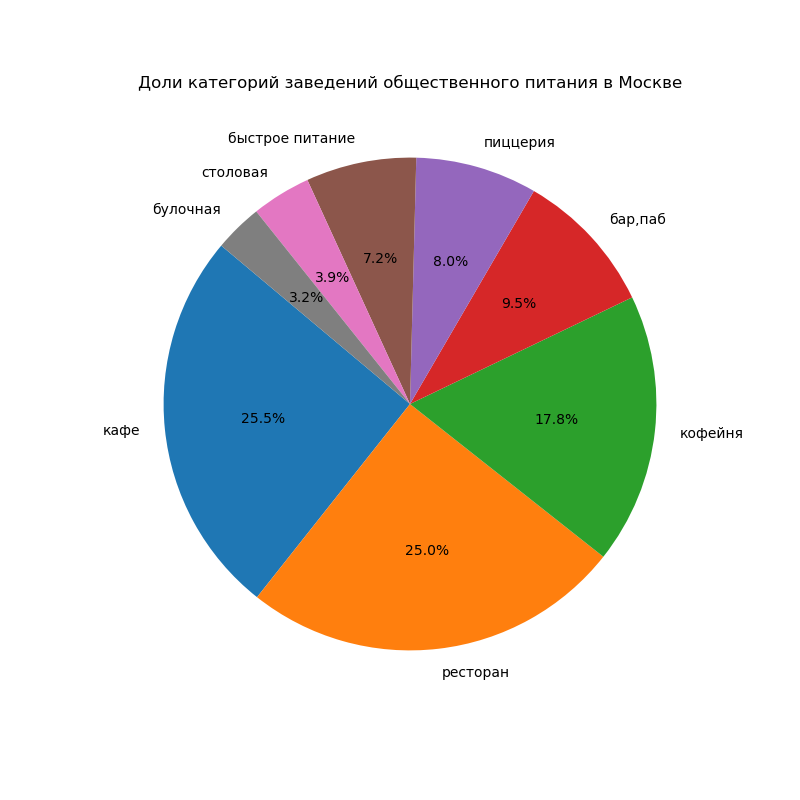

- Доминирование кафе: Кафе являются наиболее распространенной категорией, что может указывать на высокий спрос на такой формат заведений в Москве. Рестораны и кофейни также занимают значительную долю, подчеркивая популярность этих типов заведений.

- Меньшее представление баров и пиццерий: Бары и пиццерии представлены в меньшем количестве, что может свидетельствовать о более нишевом или специализированном секторе рынка.

- Важность категории для выбора инвестиций: Данные по распределению категорий могут быть полезны для инвесторов при выборе типа заведения для инвестиций. Необходимо учитывать как популярность определенных категорий, так и уровень конкуренции в них.

**Количество посадочных мест по категориям**

Анализ показал, что мы имеем дело в том числе с синтетическими данными: все заведения с 1288 посадочных мест находятся на пр. Вернадского, также там есть ресторан "Яндекс Лавка" на 1288 мест. Вряд ли это тот случай, когда приписывают лишний нуль, потому что на третьем месте в числе стояла бы цифра 0. Также заведение может находится в фуд-корте, где ему теоретически могли приписать вместимость всего фуд-корта, но тогда у него должен полностью совпадать адрес и частично время работы. У двух пар заведений адрес совпадает, но он вряд ли может совпадать между этими парами. Время работы также разное.

Остальные заведения в этом списке также могут принести больше вреда, чем пользы. В наблюдениях, у которых посадочных мест больше 900, такие значения были заменены на `NaN`.

![image.png](boxplot.png)

Мы видим, что среднее арифметическое значение сильно больше медианного для всех категорий, что говорит об асимметричности данных, от которой мы частично избавились. Обобщая, в среднем около 50% заведений во всех категориях вмещают от 20-50 до 100-150 гостей.

![image.png](avg_seats_by_category.png)

В среднем, больше всего посадочных мест у ресторанов, баров и пабов, и кофеен. Меньше всего, ожидаемо у булочных, которые чаще могут работать на вынос.

**Соотношение сетевых и несетевых заведений, в т. ч. по категориям**

![image.png](chain_share.png)

Соотношение сетевых и несетевых заведений — 39 к 61%, соответственно. Наибольшая доля сетевых заведений наблюдается у булочных — 62%. У баров и пабов меньше всего сетевых заведений — 21%.

- Больше сетевых заведений наблюдаются в категории: булочная.
- Сопоставимое соотношение сетевых и несетевых заведений наблюдается в категориях: пиццерия и кофейня.
- Больше несетевых заведений наблюдается в категортиях: быстрое питание, ресторан, кафе, столовая, бар, паб.

**Топ-15 сетевых заведений по количеству заведений**

![image.png](top15_chains.png)

Больше всего заведений У "Шоколадницы". Далее идут сети пиццерий — "Домино'с Пицца" и "Додо Пицца". Общих закономерностей в том, какие категории заведений являются самыми популярными по количеству завдедений, нет: 5 кофеен, 2 пиццерии, 3 ресторана, 4 кафе, 1 булочная. Заметим, что не все заведения одной сети принадлежат к одной категории заведений. Скорее всего, это ошибка сбора данных.

**Распределение заведений по административным округам**

![image.png](categories_by_district.png)

Больше всего заведений в выборку попало по ЦАО — более чем в 2.5 раза больше, чем в идущий на втором месте САО и чуть меньше, чем округа, занявшие 2-4 места, вместе взятые. Меньше всего заведений представлено в выборке по СЗАО.

Важное наблюдение: соотношение кофеен и кафе только в ЦАО является сопоставимым. В остальных округах кафе больше, чем кафеен. Доля баров и пабов в центре города также больше, чем в остальных округах.

**Средний рейтинг заведений по категориям**

![image.png](avg_rating.png)

Средний рейтинг выше всего у баров и пабов. Это может объясняться тем, что в баре у людей наилучшее настроение из-за употребления алкоголя. Худший средний рейтинг у заведений быстрого питания. Это может объясняться тем, что качество сервиса и продуктов там, скорее всего, самое низкое.

**Фоновая картограмма с рейтингом заведений по округам**

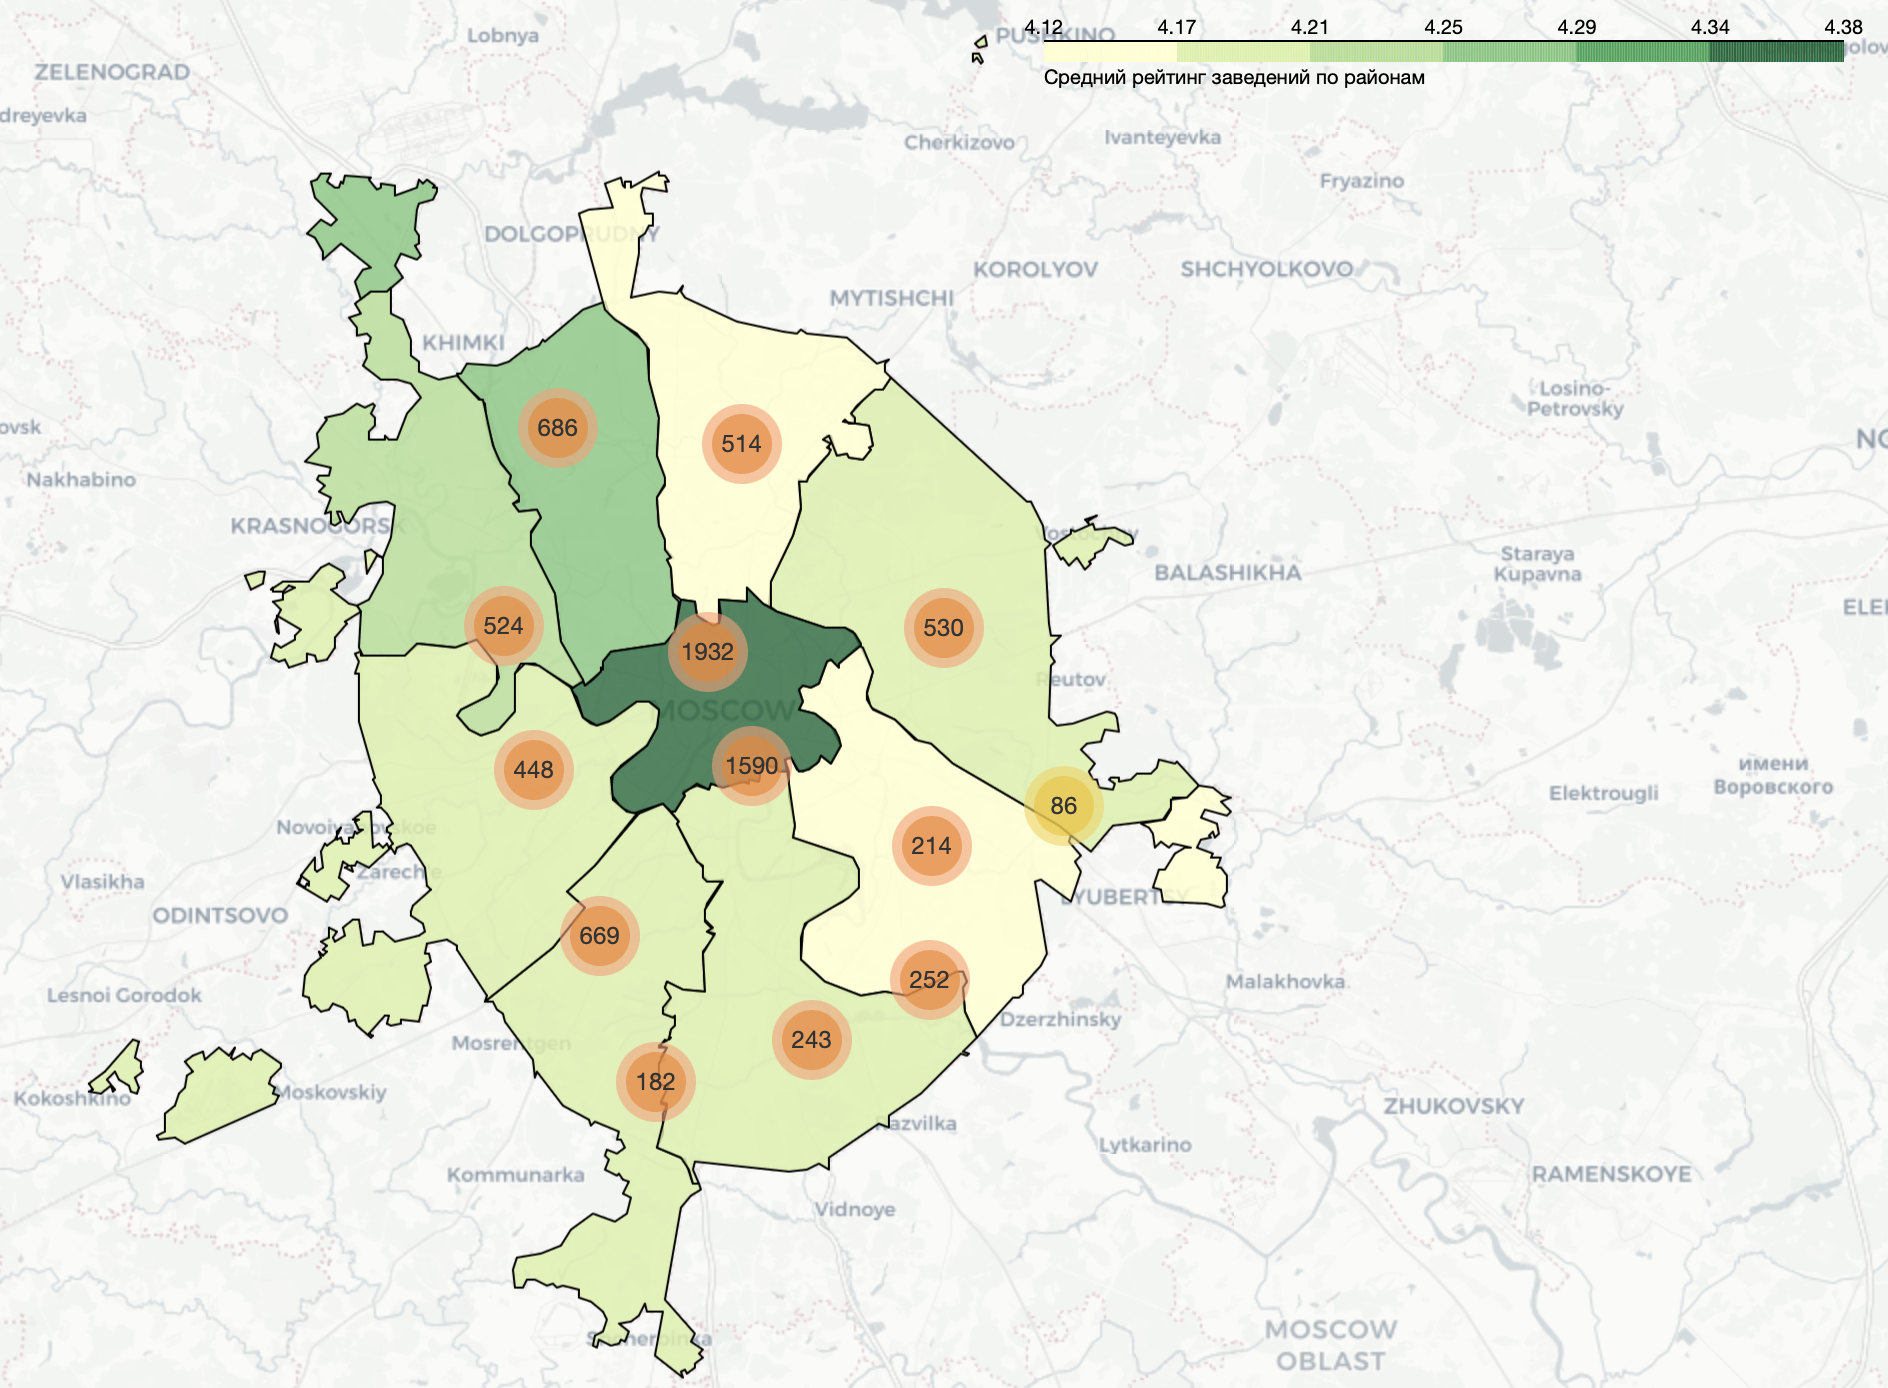

Интерактивная карта демонстрирует количество заведений по округам: чем темнее закрашен округ, тем больше в нём заведений. На карту были добавлены все заведения с помощью динамической кластеризации. 

Замечание: кластеры не распределены по округам.

**Топ-15 улиц по количеству заведений**

![image.png](top15_streets.png)

Больше всего заведений находится на пр. Мира, ул. Профсоюзной, пр. Вернадского, пр. Ленинском и пр. Ленинградском.

**Улицы с одним заведением**

72% "одиноких" заведений являются либо кафе, либо кофейней, либо рестораном. Среди "одиноких" заведений столовые, рестораны, бары и пабы открываются в среднем с большим количеством посадочных мест. Среди единственных заведений на улицах, только 29% являются сетевыми. На улицах с одним заведением большинство пиццерий будут сетевыми. Стоит отметить, что пиццерии в целом чаще являются сетевыми заведениями. Булочные в равной доле являтся сетевыми, что может навести на мысль о том, что несетевые булочные открываются предринимателями, которые видят потребность "зайти" на пустую улицу. Контринтуитивным является наблюдение о том, что большинство заведений, открытых на пустой улице, находится в центре города: в два раза больше, чем в двух последующих округах.

**Фоновая картограмма со средним чеком по округам**

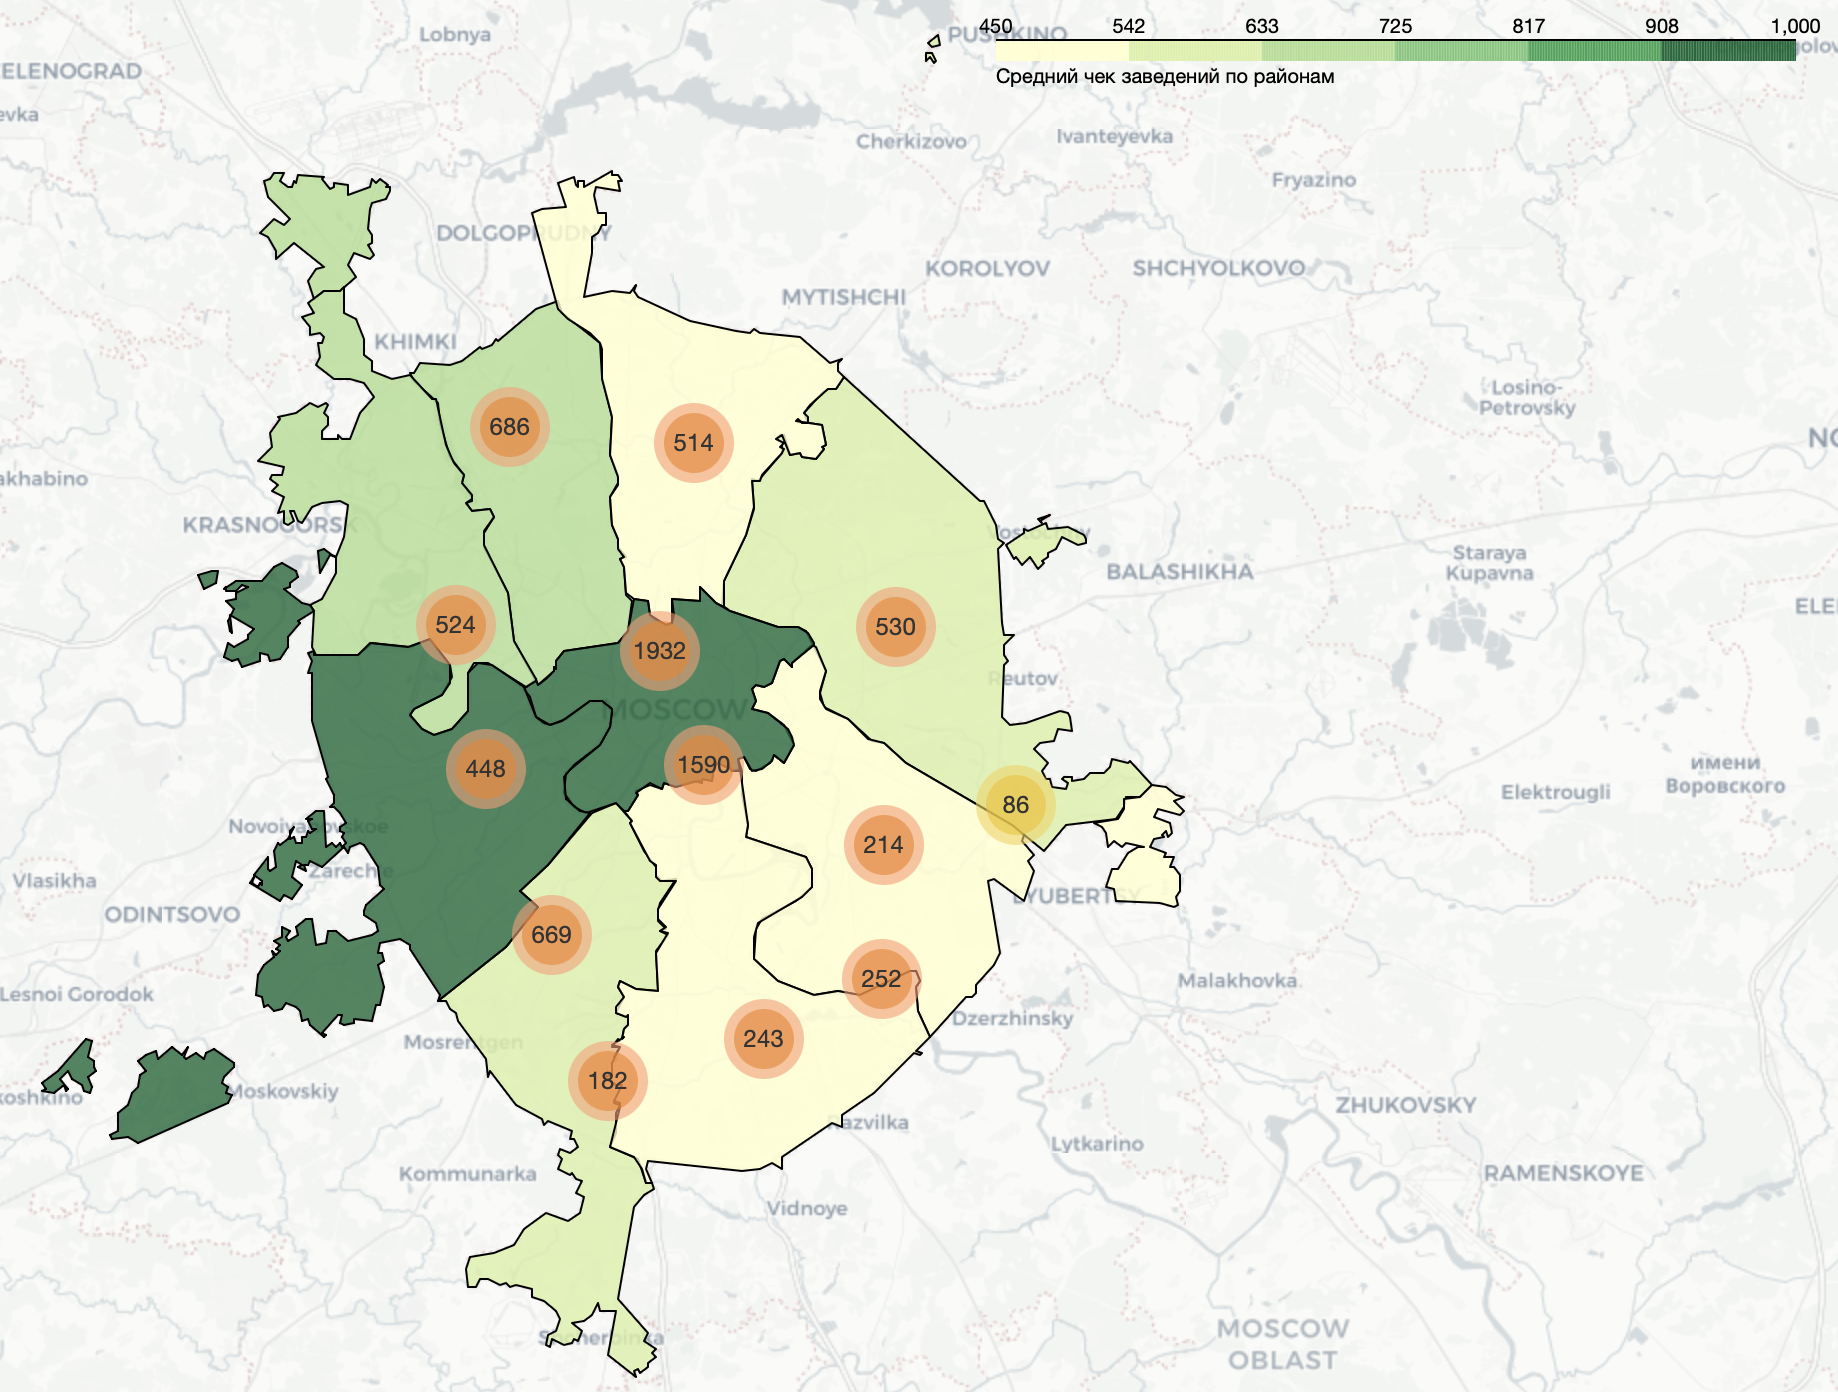

Самый высокий средний чек в ЦАО и ЗАО — видимо, в самых дорогих округах Москвы. Для того, чтобы точнее сказать о взаимосвязи среднего чека и удалённости от центра, лучше смотреть районы города, а не округа. Однако такая тендценция видна и сейчас.

Замечание: значения среднего чека нет в 60% данных, поэтому выводы нужно делать с осторожностью.

## 3. Детализация исследования: открытие кофейни

### Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [ ]:
# Посчитаем общее количество кофеен
coffee_shops = df[df['category'] == 'кофейня']
total_coffee_shops = coffee_shops.shape[0]

print(f'Всего кофеен в датасете: {total_coffee_shops}')

In [ ]:
# Сгруппируем данные по количеству заведений в каждом районе
coffee_shops_count_by_district = coffee_shops['district'].value_counts()
coffee_shops_count_by_district

In [ ]:
# Создадим график для количества кофеен по округам
plt.figure(figsize=(10, 8))
barplot = sns.barplot(y=coffee_shops_count_by_district.index, x=coffee_shops_count_by_district.values, palette="viridis")
plt.title('Распределение кофеен по районам Москвы')
plt.xlabel('Количество кофеен')
plt.ylabel('Район')

for i in range(len(coffee_shops_count_by_district)):
    plt.text(coffee_shops_count_by_district.values[i] - (0.05 * max(coffee_shops_count_by_district.values)),
             i,
             str(coffee_shops_count_by_district.values[i]),
             va='center',
             color='white')
# plt.savefig('coffee_shops_by_district')

---

В датасете представлено 1398 кофеен. Рассмотрим распределение кофеен по районам и их особенности:

1. **Центральный административный округ**: Здесь находится наибольшее количество кофеен — 426. Это объясняется высокой проходимостью, туристической привлекательностью и большим количеством деловых и развлекательных заведений в центре Москвы.

2. **Северный административный округ**: На втором месте по количеству кофеен, их здесь 191. Этот округ также характеризуется активной городской жизнью и достаточным числом жителей и рабочих мест.

3. **Северо-Восточный административный округ**: С 157 кофейнями, этот район также популярен для открытия кофеен, что может быть связано с наличием учебных заведений и офисных центров.

4. **Западный административный округ**: В этом районе находится 148 кофеен. Запад Москвы известен своими парками и культурными объектами, что также привлекает посетителей в кофейни.

5. **Южный административный округ**: Здесь расположено 130 кофеен. Этот округ также активен и имеет развитую инфраструктуру.

Основываясь на этих данных, можно сделать вывод, что наибольшая концентрация кофеен приходится на центральные и более активные районы города, где высокий трафик людей и развитая городская жизнь. Это подтверждает, что открытие кофейни в Москве, особенно в этих районах, может быть успешным предприятием.

---

### Есть ли круглосуточные кофейни?

In [ ]:
df_24_7_coffee_shops = df[(df['category'] == 'кофейня') & (df['is_24/7'] == True)]
df_24_7_coffee_shops

In [ ]:
# Группировка по названию кофейни и подсчет количества в каждой группе
coffee_shop_24_7 = df_24_7_coffee_shops.groupby('name').size().sort_values(ascending=False)
coffee_shop_24_7

In [ ]:
# Создание облака слов
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      prefer_horizontal=1,
                      max_font_size=150, 
                      min_font_size=10,
                      scale=3).generate_from_frequencies(coffee_shop_24_7)

# Визуализация облака слов
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Круглосуточные кофейни Москвы')
plt.show()

---

Круглосуточно в основном работают сетевые кофейни: "Шоколадница", "Wild Bean", "Кофемания".

---

### Какие у кофеен рейтинги? Как они распределяются по районам?

In [ ]:
# Сгруппируем данные по среднему рейтингу в каждом районе
coffee_rating_df = coffee_shops.groupby('district', as_index=False)['rating'].agg('mean').sort_values('rating', ascending=False)
coffee_rating_df

In [ ]:
# Создадим карту Москвы
moscow_map_coffee_shops = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создадим хороплет с помощью конструктора Choropleth и добавим его на карту
Choropleth(
    geo_data=geo_json,
    data=coffee_rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен по районам',
).add_to(moscow_map_coffee_shops)

# Cоздадим пустой кластер и добавим его на карту
marker_cluster_coffee_shops = MarkerCluster().add_to(moscow_map_coffee_shops)

# Используем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster_coffee_shops)
    
# Применим функцию create_clusters() к каждой строке датафрейма
df.apply(create_clusters, axis=1)

moscow_map_coffee_shops

---

Наивысший средний рейтинг у кофеен в ЦАО, несмотря на тот факт, что там больше всего кофеен, и это может занизить среднюю оценку. Это говорит о том, что качество кофеен в центре города очень высоко.

---

### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [ ]:
# Выборка кофеен, указывающих стоимость чашки капучино
coffee_shops_only = df[(df['category'] == 'кофейня') & df['avg_bill'].str.startswith('Цена чашки капучино:', na=False)].copy()

# Выделение цен из строки и преобразование в числовой формат
coffee_shops_only['avg_coffee_price'] = coffee_shops_only['avg_bill'].str.extract(r'(\d+–\d+|\d+)')
coffee_shops_only['avg_coffee_price'] = coffee_shops_only['avg_coffee_price'].str.split('–')

# Функция для вычисления средней цены из диапазона
def calculate_average_price(price_range):
    if isinstance(price_range, list):
        if len(price_range) == 2:
            return (int(price_range[0]) + int(price_range[1])) / 2
        elif len(price_range) == 1:
            return int(price_range[0])
    return None

# Применение функции к столбцу с ценами
coffee_shops_only['avg_coffee_price'] = coffee_shops_only['avg_coffee_price'].apply(calculate_average_price)

# Группировка по округам и вычисление средней стоимости чашки капучино
average_coffee_price_by_district = coffee_shops_only.groupby('district', as_index=False)['avg_coffee_price'].agg('mean').sort_values('avg_coffee_price', ascending=False)

average_coffee_price_by_district

In [ ]:
# Преобразуем серию обратно в DataFrame для удобства визуализации
average_coffee_price_df = average_coffee_price_by_district.reset_index()

# Для упорядочивания по медиане нужно сначала вычислить медиану для каждого округа
median_prices = coffee_shops_only.groupby('district')['avg_coffee_price'].median().sort_values(ascending=False)
sorted_districts = median_prices.index

# Теперь создаем boxplot с упорядоченными округами
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='avg_coffee_price',
    y='district',
    data=coffee_shops_only,
    palette='viridis',
    showfliers=False,
    order=sorted_districts)

plt.title('Средняя цена чашки капучино по округам Москвы')
plt.xlabel('Средняя цена чашки капучино (руб.)')
plt.ylabel('Округ')
# plt.savefig('capuccino.png', bbox_inches='tight')

---

Во-первых, мы сужаем срез только до кофеен, потому что неверно сравнивать цены с другими категориями заведений, потому что у них могут быть несопоставимые затраты. Во-вторых, установление цены чашки капучино зависит от округа, в котором хочется открыть кофейню. Если есть желание открыть кофейную в высококонкурентных округах, то цена должна начинаться со 180 рублей и выше, чтобы не слишком продешевить, но и чтобы привлечь внимание к кофейне на этапе входа на рынок.

---

## Рекомендации

Учитывая результаты проведённого исследования, предлагаю следующее:
- Если у инвесторов не было опыта открытия кофеен, то открываться в высококонкурентных округах типа ЦАО, где самые требовательные к качеству потребители, не стоит. Вместо этого я бы сделал выбор в пользу округа с низким средним рейтингом — ЗАО, ЮВАО, СВАО — или с низкой плотностью — ЮЗАО, ЮВАО, СЗАО.
- В ЗАО самая дорогая цена чашки капучино, а в ЮВАО — самая маленькая. Следовательно, от склонности риска инвестора зависит, будет ли он рисковать, но получать большую прибыль в ЗАО (при прочих равных условиях) или не рисковать, но получать меньшую прибыль в ЮВАО.
- Открывать круглосуточную кофейню также не стоит, потому что не выявлен спрос на такой режим работы заведения. Требуется дальнейшее исследование с другими данными.

**По-моему мнению, стоит рассмотреть открытие кофейни в ЮВАО.**